## PART ONE PROJECT BASED


* ### DOMAIN: Automobile 
* ### CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes  

In [174]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")
import pylab as pl
from sklearn.datasets import fetch_lfw_people

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score,recall_score,precision_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold,KFold,cross_val_score,learning_curve
from scipy.stats import zscore, norm
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  

from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [175]:
# importing the dataset into 2 dataframes

car1 = pd.read_json("Part1 - Car-Attributes.json")
car2 = pd.read_csv("Part1 - Car name.csv")

In [176]:
# exploring the shape and size of the dataframes

print("The shape and size of the first dataframe ",car1.shape)
print("The shape and size of the second dataframe",car2.shape)

The shape and size of the first dataframe  (398, 8)
The shape and size of the second dataframe (398, 1)


In [177]:
# merging the dataframes into a single dataframe

car = car1.join(car2)

In [178]:
# exploring the shape of the merged dataframe

print("The shape and size of the merged dataframe is",car.shape)

The shape and size of the merged dataframe is (398, 9)


In [179]:
# exporting the data csv,xlsx,json for future use

car.to_csv('ProjectCars.csv',index=False)
car.to_excel('ProjectCars.xlsx',index=False)
car.to_json('ProjectCars.json')

In [180]:
# reading the data from the saved csv file

car = pd.read_csv("ProjectCars.csv")

In [181]:
# checking the datatype and null of the dataframe

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


* ### The hp column is of type object. We will look into it and correct it

In [182]:
# droping the car_name column

car = car.drop('car_name',axis = 1)

In [183]:
# checking the hp columm

isdigit = pd.DataFrame(car['hp'].str.isdigit())
car[isdigit['hp']==False]

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [184]:
# replacing the values "?" in hp with Nan values

car = car.replace("?",np.nan)

In [185]:
# filling the nan with median values

medianFiller = lambda x: x.fillna(x.median())
car = car.apply(medianFiller,axis=0)

car['hp'] = car['hp'].astype('float64')

In [186]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


* ## mpg:
    The mean and median have same values. The min is 9 and the max is 46 which is greater than the 75% value of 29. The data has outliers on the right side
* ## cyl:
    The mean is slightly greater than the median. The min value is 3 and max value is 8 whihc is the same as 75%. The data follows a normal distribution with no outliers.
* ## disp:
    The mean is greater than the median. The min value is 68 which is very less than the 25%. The max value is 455 which is greater than the 75% value. The data is skewed to the right with outliers.
* ## hp:
    The mean is slightly greater than the median. The min value is 46 and the max value is 230 which is much greater than 75%. The data has a slight skewness with outliers on the right side
* ## wt:
    The mean is greater than the median. The min value is 1613 and the max value is 5140 which is greater than the 75% value. The data is skewed to the right and has outliers
* ## acc:
    The mean is equal to the median. The min value is 8 and the max value is 24 which is slightly greater than 75%. The data follows a normal distribution
* ## yr:
    The mean and the median are equal. Teh min value is 70 and the max value is 82 which is slightly greater than 75%. The data is normally distributed.
* ## origin:
    It is a categorical variable where the values ranges from 1 to 3

## Univariate analysis

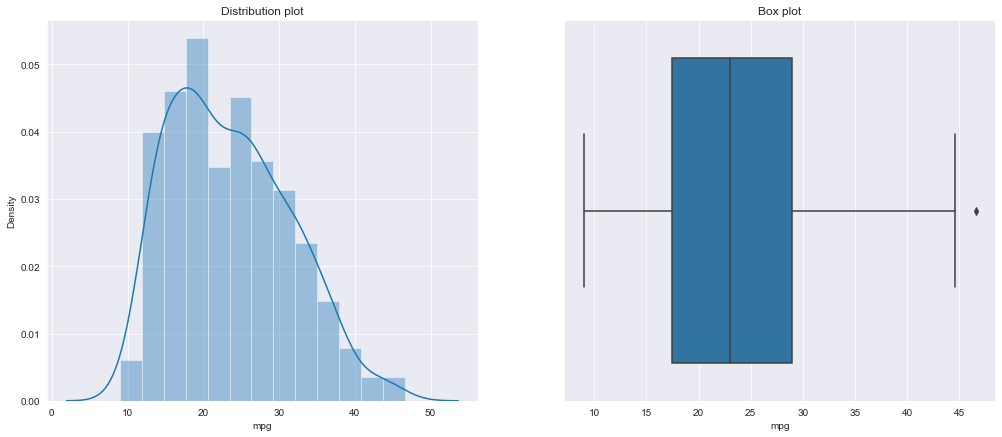

In [187]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'mpg', data=car,  orient='h' , ax=axes[1]);
sns.distplot(car['mpg'],  ax=axes[0]);
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

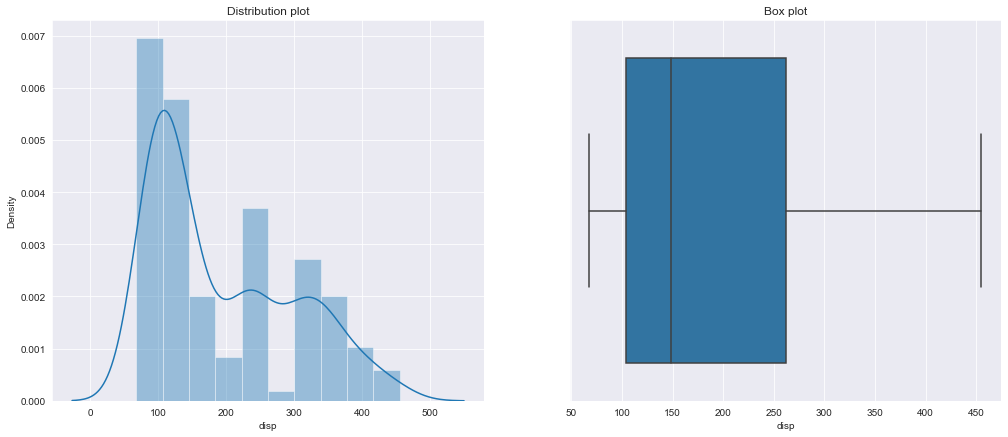

In [188]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'disp', data=car,  orient='h' , ax=axes[1]);
sns.distplot(car['disp'],  ax=axes[0]);
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

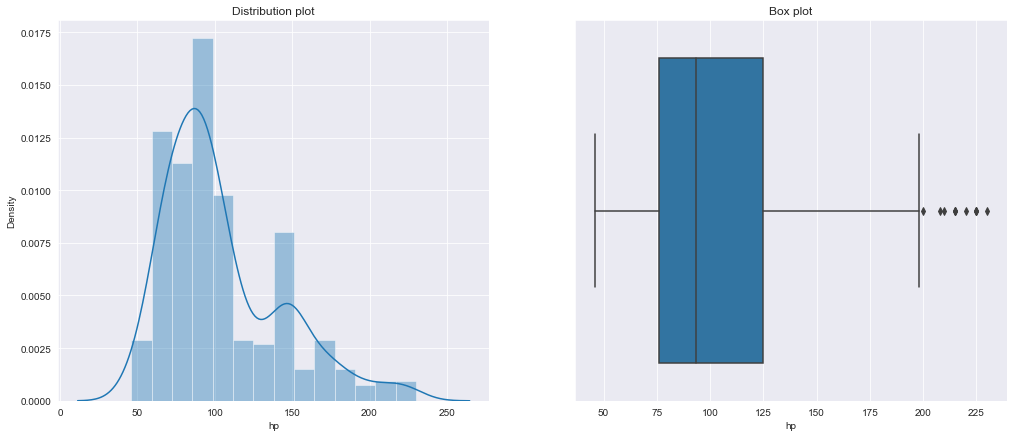

In [189]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'hp', data=car,  orient='h' , ax=axes[1]);
sns.distplot(car['hp'],  ax=axes[0]);
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

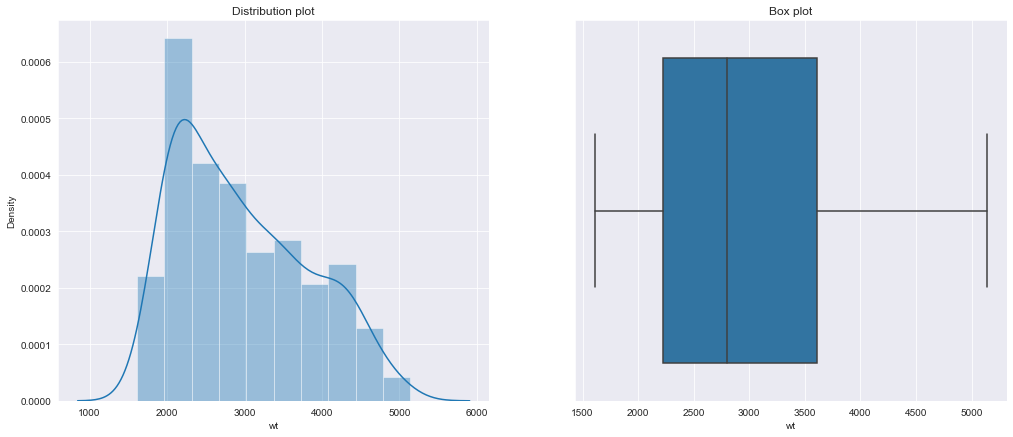

In [190]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'wt', data=car,  orient='h' , ax=axes[1]);
sns.distplot(car['wt'],  ax=axes[0]);
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

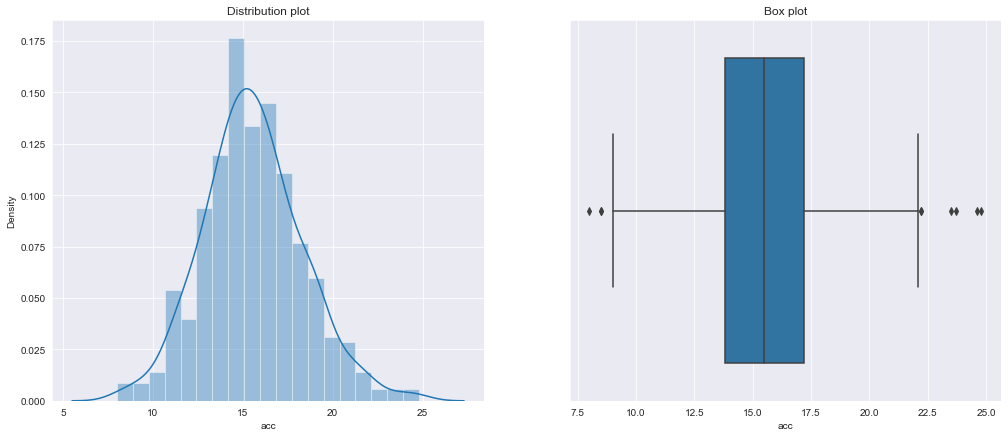

In [191]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'acc', data=car,  orient='h' , ax=axes[1]);
sns.distplot(car['acc'],  ax=axes[0]);
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

* ## mpg:
    The data is skewed to right with outliers
* ## disp:
    The data is skewed to the right with no outliers
* ## hp:
    The data is skewed to the right with many outliers
* ## wt:
    The data follows a normal distribution with slight skewness to the right
* ## acc:
     The data follows a normal distribution with skewness on both the sides and outliers on both the sides

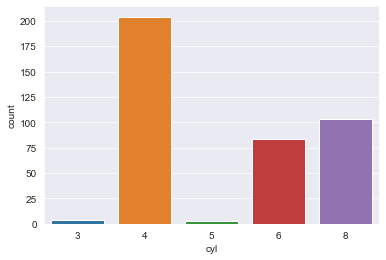

In [192]:
sns.countplot(x = 'cyl',data = car);

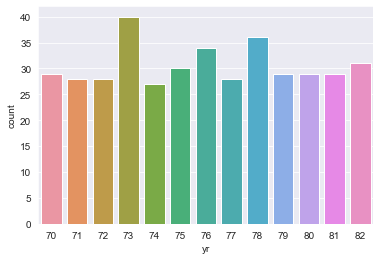

In [193]:
sns.countplot(x = 'yr',data = car);

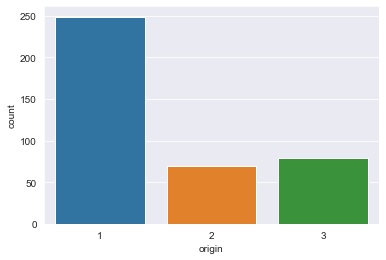

In [194]:
sns.countplot(x = 'origin',data = car);

* ### cyl:
    The vehicles with 4 cylinders has the highes count. The count of 8 cylinders and the 6 cylinders nearly equal. The count of 3 cylinder and 5 cylinder vehicles is the lowest
* ## yr:
    The vehicle where the year it was manufactered is 73 has the highest frequency. All the other vehicles manufactured on other years is nearly the same
* ## origin:
    The vehicles with origin as 1 has the highest frequency among the other origin classes.

## Bi-variate analysis

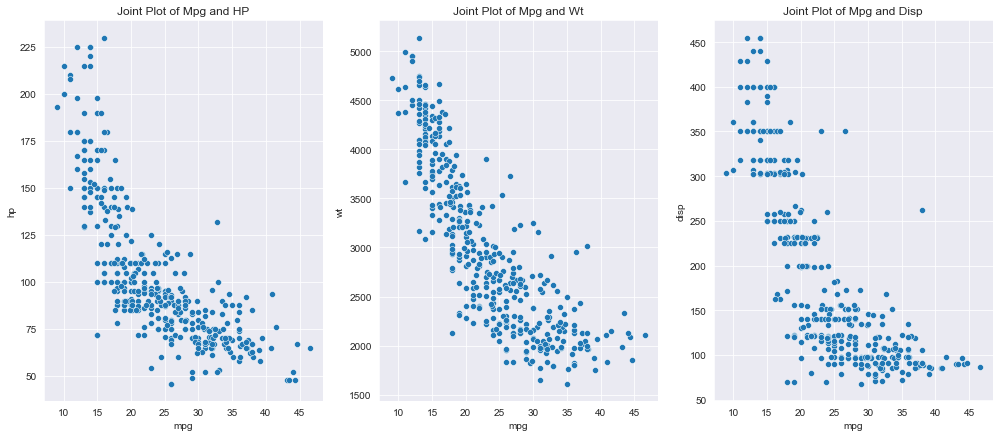

In [195]:
f, axes = plt.subplots(1, 3, figsize=(17,7))
sns.scatterplot(x = 'mpg',y = 'hp',data = car, ax=axes[0]);
sns.scatterplot(x = 'mpg',y = 'wt',data = car,  ax=axes[1]);
sns.scatterplot(x = 'mpg',y = 'disp',data = car,  ax=axes[2]);
axes[0].set_title('Joint Plot of Mpg and HP')
axes[1].set_title('Joint Plot of Mpg and Wt')
axes[2].set_title('Joint Plot of Mpg and Disp')
plt.show()

* ## Mpg:
    It is negatively correlated with variables hp,wt and disp

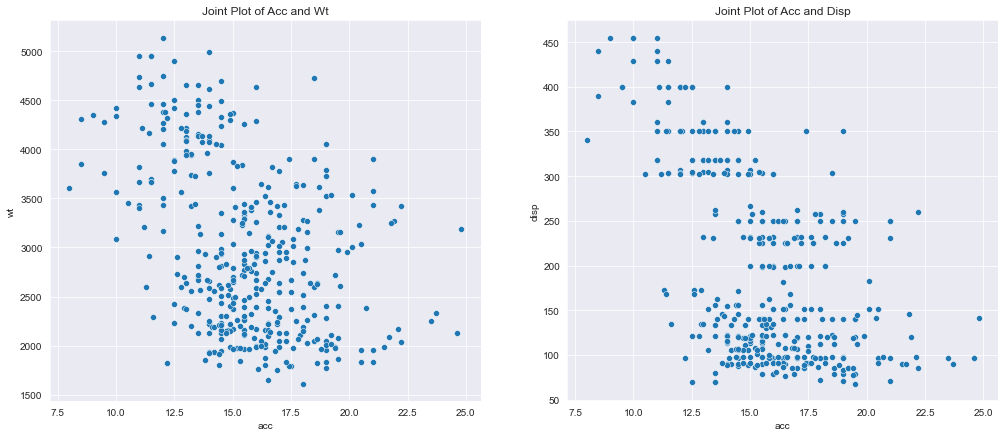

In [196]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.scatterplot(x = 'acc',y = 'wt',data = car, ax=axes[0]);
sns.scatterplot(x = 'acc',y = 'disp',data = car,  ax=axes[1]);
axes[0].set_title('Joint Plot of Acc and Wt')
axes[1].set_title('Joint Plot of Acc and Disp')
plt.show()

* ## Acc:
    It has a weak negative correlation with Wt and disp

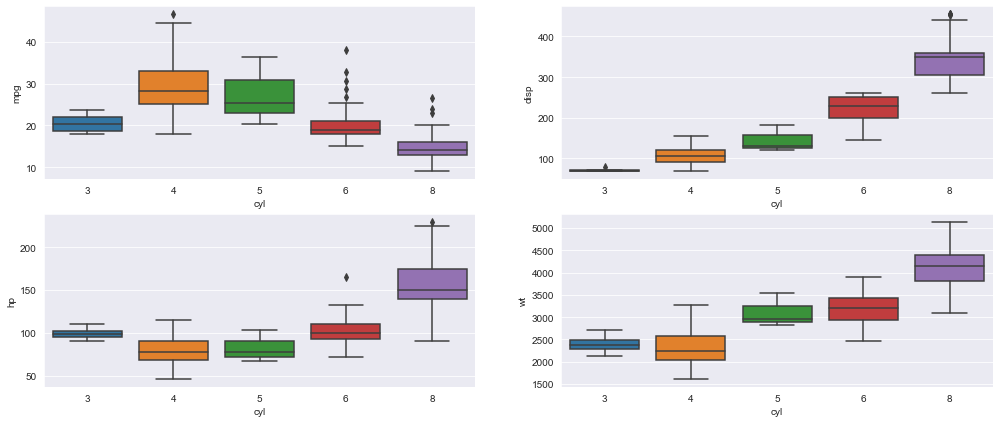

In [197]:
f, axes = plt.subplots(2, 2, figsize=(17,7))
sns.boxplot(x = 'cyl',y = 'mpg',data = car, ax=axes[0][0]);
sns.boxplot(x = 'cyl',y = 'disp',data = car,  ax=axes[0][1]);
sns.boxplot(x = 'cyl',y = 'hp',data = car,  ax=axes[1][0]);
sns.boxplot(x = 'cyl',y = 'wt',data = car,  ax=axes[1][1]);
plt.show()

* ### cylinder 3:
	Clyinder 3 has mean equal to cylinder 6 in mpg. It has the lowest mean in disp. The mean is greater than cylinder 4 and 5 but equal to the mean of cylinder 6 in hp. The mean is almost as the same as cylinder 4 in wt

* ### cylinder 4:
	Cylinder 4 has the highest mean in mpg when compared to all other classes. The mean is greater than cylinder 3 in disp. The mean is equal to cylinder 5 in hp. The mean is almost equal to cylinder 3 in wt


* ### cylinder 5:
	The mean is slightly less than the highest ean of cylinder 4 in mpg. The mean is greater than both cylinder 3 and 4 in disp and hp. The mean is equal to cylinder 4 in hp.



* ### cylinder 6:
	The mean is almost equal to cylinder 3 in mpg and cylinder. The mean is greater than cylinder 3,4 and 5 in both disp and wt.


* ### cylinder 8:
	The mean is the lowest in mpg and has the highest mean among the classes in all of the variables
	

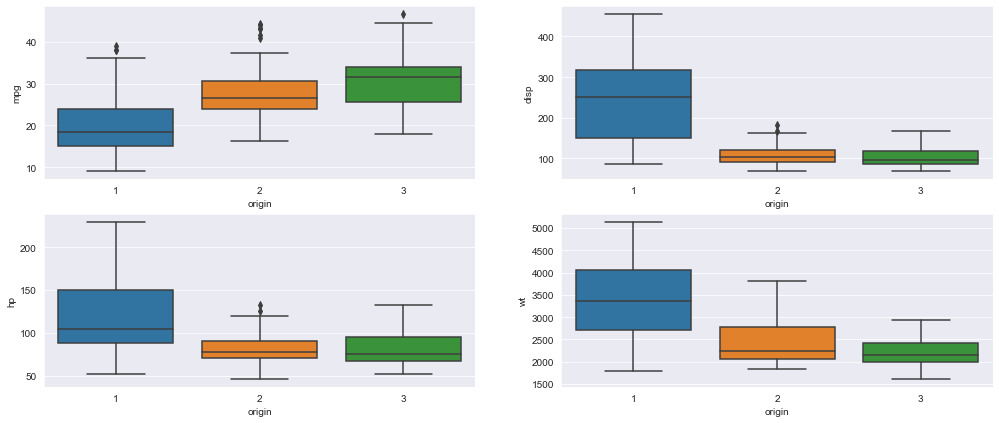

In [198]:
f, axes = plt.subplots(2, 2, figsize=(17,7))
sns.boxplot(x = 'origin',y = 'mpg',data = car, ax=axes[0][0]);
sns.boxplot(x = 'origin',y = 'disp',data = car,  ax=axes[0][1]);
sns.boxplot(x = 'origin',y = 'hp',data = car,  ax=axes[1][0]);
sns.boxplot(x = 'origin',y = 'wt',data = car,  ax=axes[1][1]);
plt.show()

* ## origin 1:
    Class 1 in origin has higher mean in all the variable except mpg
* ## origin 2:
    Class 2 in origin has higher mean than class 1 in mpg, class 2 has the same mean as class 3 in hp and disp. Class 2 in origin has higher mean than class 3 in wt
* ## origin 3:
    Class 3 in origin has the highest mean in mpg. Class 3 has the same mean as class 2 i hp and disp. Class 3 has the lowest mean in wt

## Multi-variate analysis

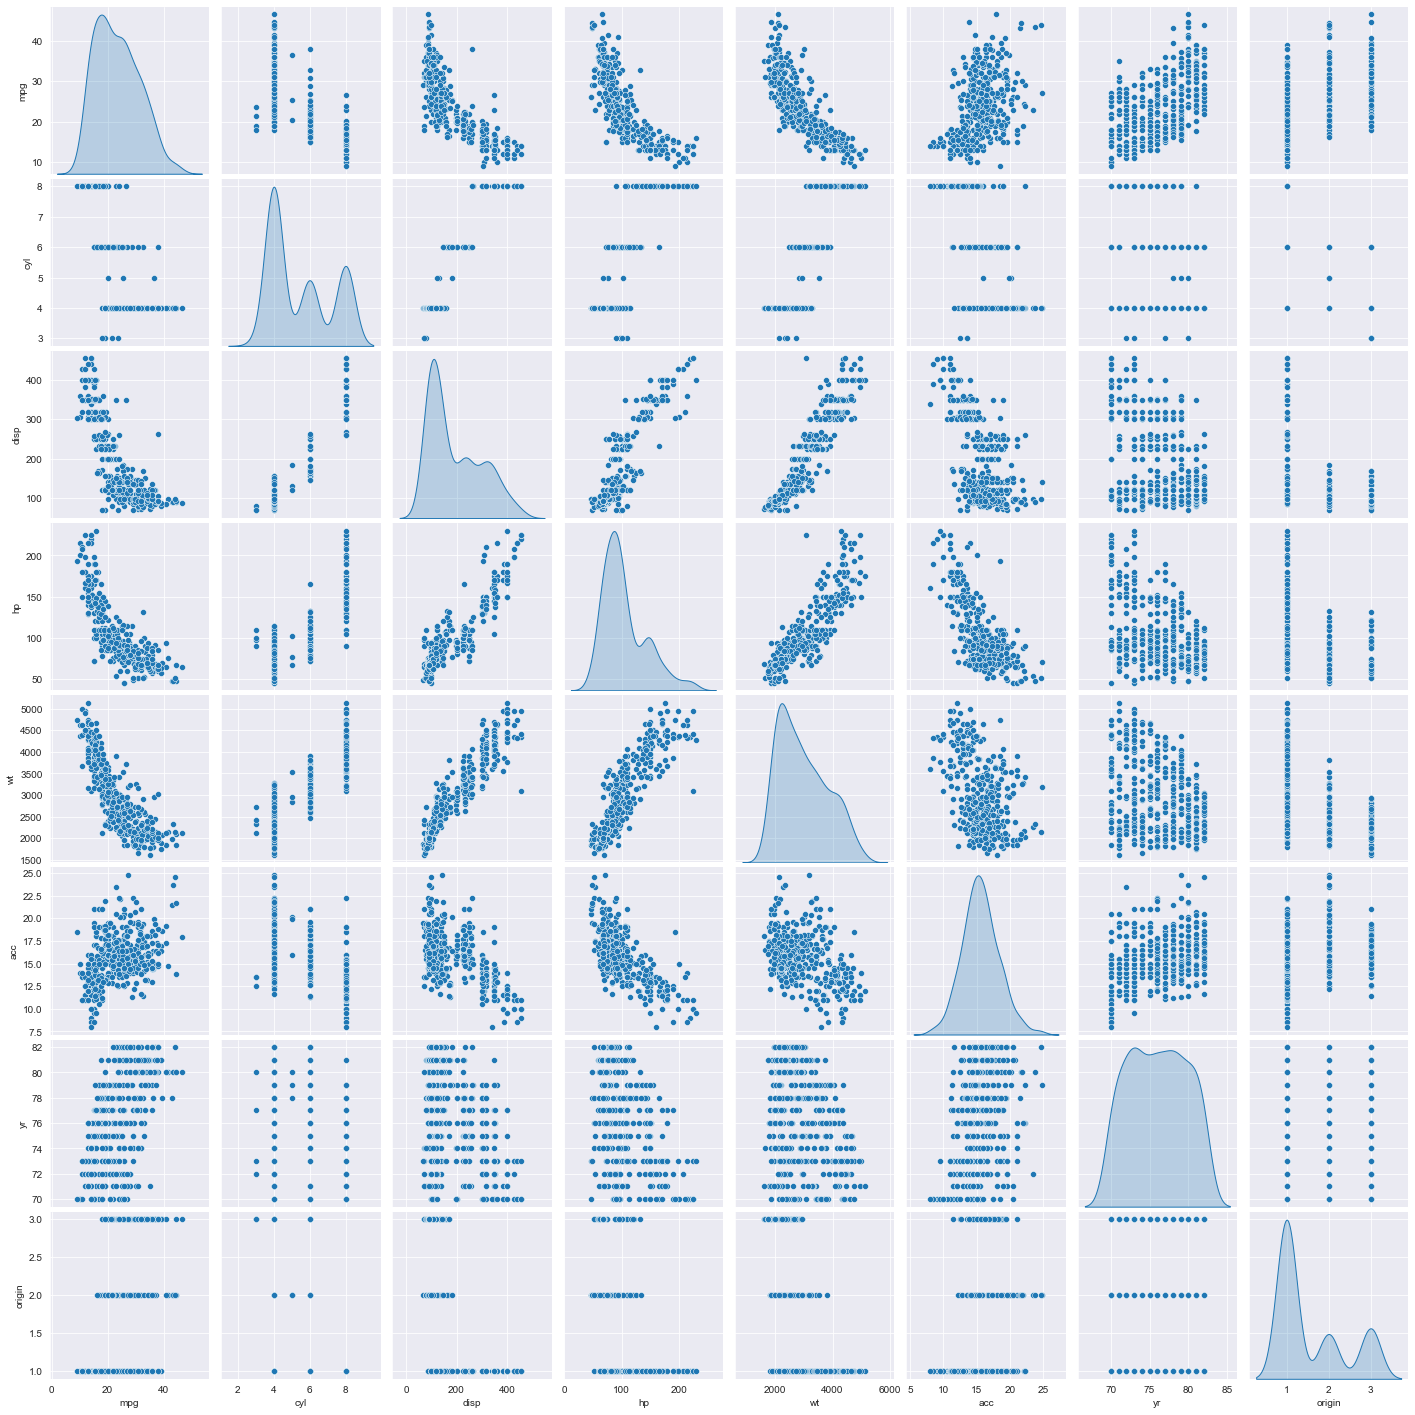

In [199]:
sns.pairplot(data = car,diag_kind='kde');

* ### The diagonals can tell us about the possible number of clusters. We can see 3 peaks in most of the diagonals and can say that atleast 3 clusters can be present in the data

Text(0.5, 1.0, 'Correlation Matrix of Data')

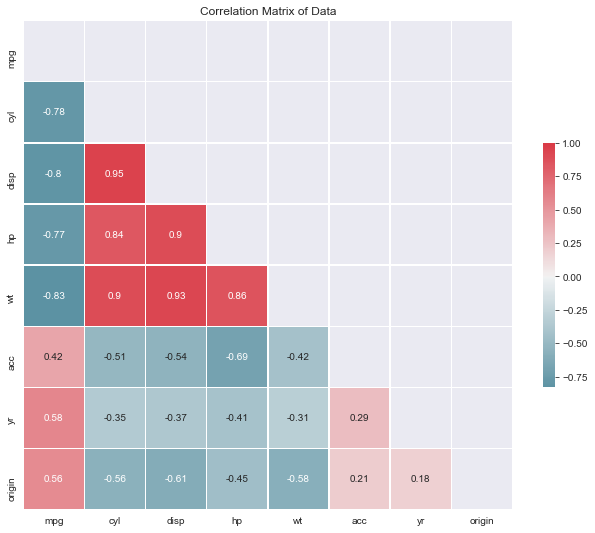

In [200]:
corr = car.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix of Data')

* ### origin:
    It has negative correlation with cylinder,disp,hp and wt. It has positive correlation with mpg,acc and yr
* ## yr:
    It has positive correlation with mpg and acc. It has negative correlation with cyl,disp,hp and wt
* ## acc:
    It has positive correlation with mpg. It has negative correlation with cyl,disp,hp and wt
* ## wt:
    It has high negative correlation with mpg. It has high postiive correlation with cyl disp and hp
* ## hp:
    It has high positive correlation with cyl and disp. It has high negative correlation with disp
* ## disp:
    It has high negative correlation with mpg

In [201]:
# handling outliers in these columns

col=['mpg','hp','acc']
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(car[c],25),np.percentile(car[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    #taking mean of a column without considering outliers
    car_include = car.loc[(car[c] >= lower) & (car[c] <= upper)]
    mean=int(car_include[c].mean())
    #imputing outliers with mean
    car[c]=np.where(car[c]>upper,mean,car[c])
    car[c]=np.where(car[c]<lower,mean,car[c])

In [202]:
# Calculate age of vehicle
car['age'] = 83-car['yr']
car.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,age
0,18.0,8,307.0,130.0,3504,12.0,70,1,13
1,15.0,8,350.0,165.0,3693,11.5,70,1,13
2,18.0,8,318.0,150.0,3436,11.0,70,1,13
3,16.0,8,304.0,150.0,3433,12.0,70,1,13
4,17.0,8,302.0,140.0,3449,10.5,70,1,13


In [203]:
# One-hot encoding the variables

one_hot = pd.get_dummies(car['origin'])
one_hot = one_hot.add_prefix('origin_')

# merge in main data frame
car = car.join(one_hot)
car.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,age,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,13,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,13,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,13,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,13,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,13,1,0,0


In [204]:
# Let us now remove irrelevant columns

cars_new = car.drop(['yr','origin'], axis =1)

cars_new.head()

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,13,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,13,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,13,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,13,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,13,1,0,0


In [205]:
# scaling all the columns

cars_new[['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'age', 'origin_1', 'origin_2',
       'origin_3']] =cars_new[['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'age', 'origin_1', 'origin_2',
       'origin_3']].apply(zscore)

* ## K-Means Clustering

In [206]:
# Creating new clusters and checking the cluster errors

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(cars_new)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3980.000000
1,2,2234.916546
2,3,1679.295127
3,4,1177.161933
4,5,975.471337
5,6,901.555173
6,7,815.652396
7,8,767.260966
8,9,692.863304
9,10,672.576059


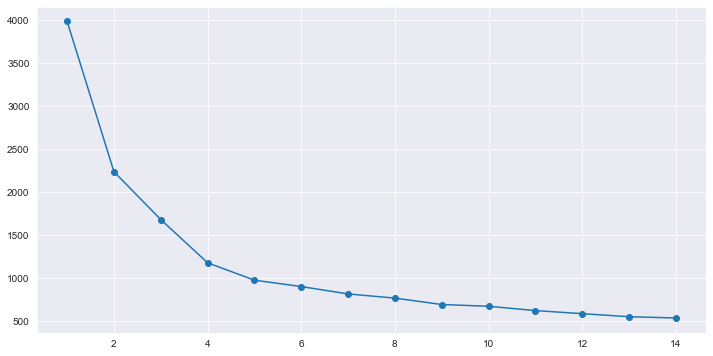

In [207]:
# Plotting the no of cluster with the cluster errors

from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

* ### The optimum number of clusters seems to be around 3 to 5. We will use the silhouette score to identify the no of clusters. We will choose the number of cluster with the highest silhouette score

In [208]:
for num_clusters in range(2,15):
    clusters = KMeans(num_clusters)
    clusters.fit(cars_new)
    prediction=clusters.predict(cars_new)
    silhouette_avg = silhouette_score(cars_new, prediction)
    print("The number of cluster is ",num_clusters,"The silhouette_avg is ",silhouette_avg)

The number of cluster is  2 The silhouette_avg is  0.37463539494521664
The number of cluster is  3 The silhouette_avg is  0.34933655680902503
The number of cluster is  4 The silhouette_avg is  0.4355779524996332
The number of cluster is  5 The silhouette_avg is  0.4002985838172187
The number of cluster is  6 The silhouette_avg is  0.3823508447223998
The number of cluster is  7 The silhouette_avg is  0.3600519736715555
The number of cluster is  8 The silhouette_avg is  0.31751527182057426
The number of cluster is  9 The silhouette_avg is  0.3412528882033951
The number of cluster is  10 The silhouette_avg is  0.31159413435054883
The number of cluster is  11 The silhouette_avg is  0.31434498317367643
The number of cluster is  12 The silhouette_avg is  0.28201025428798365
The number of cluster is  13 The silhouette_avg is  0.30587987948733925
The number of cluster is  14 The silhouette_avg is  0.30106507705099056


* ## The silhouette score of the 4 clusters seems to be the highest. We will choose the number of clusters as 4.Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.



    * 1: Means clusters are well apart from each other and clearly distinguished.
    * 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
    * -1: Means clusters are assigned in the wrong way.

In [209]:
# fitting the dataset with 4 clusters

kmeans = KMeans(n_clusters=4, random_state=12345)
kmeans.fit(cars_new)

KMeans(n_clusters=4, random_state=12345)

In [210]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[100  70 149  79]


In [211]:
# create array with the predictions of the kmeans clusters

predictions = kmeans.predict(cars_new)

* ## AgglomerativeClustering

* ## Cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram closer it is to 1, the better is the clustering. We will use the Cophenet index to compare different methods in Agglomerative Clustering and build the model which best represents the data

In [212]:

Z1 = linkage(cars_new, metric='euclidean', method='average')
c1, coph_dists = cophenet(Z1 , pdist(cars_new))

c1

0.7782144325172066

In [213]:

Z2 = linkage(cars_new, metric='euclidean', method='complete')
c2, coph_dists = cophenet(Z2 , pdist(cars_new))

c2

0.7231205617376878

In [214]:

Z3 = linkage(cars_new, metric='euclidean', method='single')
c3, coph_dists = cophenet(Z3 , pdist(cars_new))

c3

0.6499284085391489

In [215]:


Z4 = linkage(cars_new, metric='euclidean', method='ward')
c4, coph_dists = cophenet(Z4 , pdist(cars_new))

c4

0.7529907380847856

* ## The highest Cophenet index is the method with use the averages to determine the clusters(Z1). We will use the Average method on different number of clusters and find the best fit one using Silhouette score

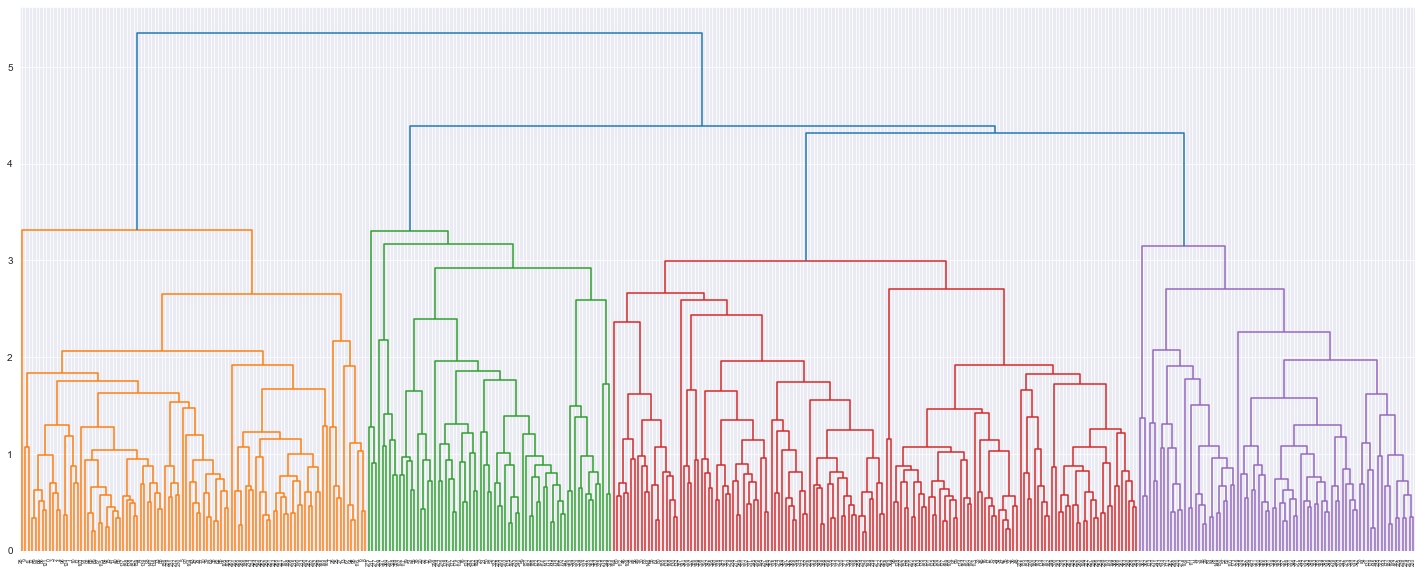

In [216]:
plt.figure(figsize=(25, 10))
dendrogram(Z1)
plt.show()

* ##  When we cut the dendogramic distance at 4. We will end up getting 4 clusters. We will further check the number of clusters with the use of silhouette score

In [217]:
for num_clusters in range(2,15):
    clusters = AgglomerativeClustering(num_clusters,linkage='average',affinity='euclidean')
    clusters.fit(cars_new)
    prediction=clusters.fit_predict(cars_new)
    silhouette_avg = silhouette_score(cars_new, prediction)
    print("The number of cluster is ",num_clusters,"The silhouette_avg is ",silhouette_avg)

The number of cluster is  2 The silhouette_avg is  0.36926408544576145
The number of cluster is  3 The silhouette_avg is  0.3326341453167216
The number of cluster is  4 The silhouette_avg is  0.43518393925974685
The number of cluster is  5 The silhouette_avg is  0.39763547191347026
The number of cluster is  6 The silhouette_avg is  0.3680158900554542
The number of cluster is  7 The silhouette_avg is  0.3620191573860204
The number of cluster is  8 The silhouette_avg is  0.32644955548363325
The number of cluster is  9 The silhouette_avg is  0.32714181660399955
The number of cluster is  10 The silhouette_avg is  0.3343357537429925
The number of cluster is  11 The silhouette_avg is  0.3446147286546636
The number of cluster is  12 The silhouette_avg is  0.3245265379592021
The number of cluster is  13 The silhouette_avg is  0.3259991939112105
The number of cluster is  14 The silhouette_avg is  0.31869599828617184


* ## The number of clusters of 4 has the highest silhouette score of 0.43518393925974685

In [218]:
clustering = AgglomerativeClustering(n_clusters=4,linkage='average')
predictions_clustering = clustering.fit_predict(cars_new)

In [219]:
# Check the number of data in each cluster

labels_clustering = clustering.labels_
counts = np.bincount(labels_clustering[labels_clustering>=0])
print(counts)

[ 99  79  70 150]


In [220]:
silhouette_avg = silhouette_score(cars_new, predictions)
silhouette_avg

0.4355779524996332

In [221]:
silhouette_avg = silhouette_score(cars_new, predictions_clustering)
silhouette_avg

0.43518393925974685

* #### We will use the K-Means clustering method since it has a higher silhouette score than aglomerative clustering

* ### K-Means Clustering divides data points into different pre defined (K) clusters, where a datapoint in each cluster would only belong to that cluster. The cluster would consist of data which share similarities with one another, implying that data points in different clusters would be dissimilar to one another. It is a centroid based algorithm since it randomly assigns the cluster centroids. It is much faster than the Agglomerative as it only calculates the distance between the centroid and the data points. 
    * Choose your value of K
    * Randomly select K data points to represent the cluster centroids
    * Assign all other data points to its nearest cluster centroids
    * Reposition the cluster centroid until it is the average of the points in the cluster
    * Repeat steps 3 & 4 until there are no changes in each cluster

* ### Agglomerative Clustering or bottom-up clustering essentially started from an individual cluster (each data point is considered as an individual cluster, also called leaf), then every cluster calculates their distance with each other. The two clusters with the shortest distance with each other would merge creating what we called node. Newly formed clusters once again calculating the member of their cluster distance with another cluster outside of their cluster. The process is repeated until all the data points assigned to one cluster called root. The result is a tree-based representation of the objects called dendrogram. Although we are presented with the result of how the data should be clustered; Agglomerative Clustering does not present any exact number of how our data should be clustered. It is up to us to decide where is the cut-off point.Agglomerative Clustering also takes time as it computes the pairwise distance between all the data points. This type of clustering is not suitable for large datasets


* ### The optimal number of clusters is 4 for this dataset. The possible reason behind this could be because of the columns like cylinder and origin. The no of cylinders has an effect on mpg,disp,hp and wt. The  mpg,disp,hp and wt have different mean for different number of cylinders. When we compare the number of cylinders with all the continous variables, we found that cylinders 4 and 5 can be grouped and 3 and 6 can be grouped since the they share similar mean values in mpg and hp. And the cylinder 8 for almost all the continous variables is either distinctively high or low.

* ### Origin also has an effect on mpg, disp, hp and wt. The mpg, disp, hp and wt have different mean for different origin. The origin of 2 and 3 can be grouped together into a single groupe as they share similar mean and ranges across all the continous variables. The orign is distinctively high or low in all of the continous variables

In [222]:
# creating dataframe using the scaled values

car_linear_scaled = cars_new[['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'age', 'origin_1', 'origin_2',
       'origin_3']]

In [223]:
# assigning the prediction to the new dataframe

car_linear_scaled['group'] = predictions

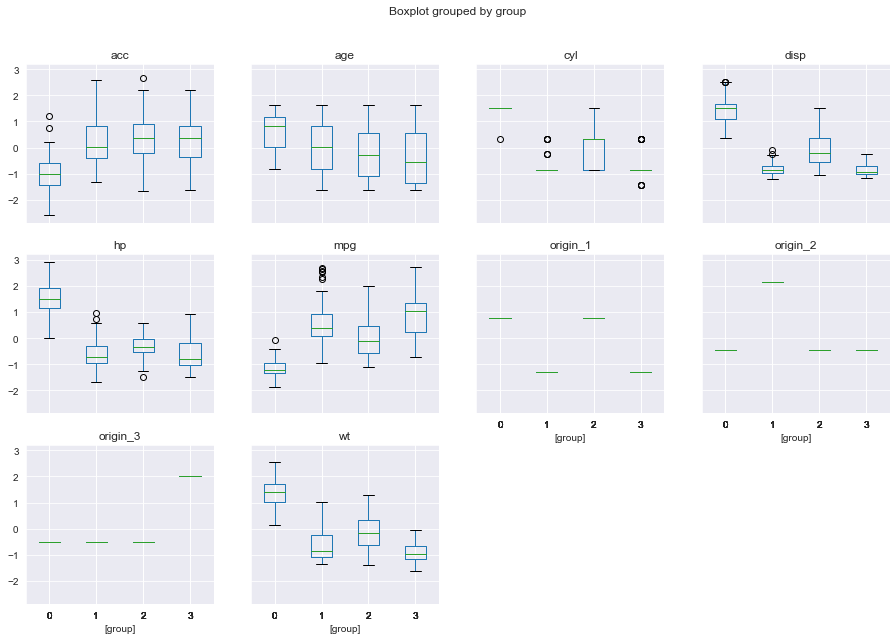

In [224]:
# plotting the different group mean in boxplot

car_linear_scaled.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10));

In [225]:
car_linear_scaled.groupby(by = 'group').mean().T

group,0,1,2,3
mpg,-1.132200,0.574651,0.029962,0.867468
cyl,1.486419,-0.763822,-0.216336,-0.796713
disp,1.468657,-0.809334,-0.143585,-0.871117
hp,1.411633,-0.609801,-0.320078,-0.642855
wt,1.367364,-0.646890,-0.144129,-0.885809
acc,-1.029521,0.310189,0.400340,0.273269
age,0.611986,0.053010,-0.229898,-0.388030
origin_1,0.773559,-1.292726,0.773559,-1.292726
origin_2,-0.461968,2.164651,-0.461968,-0.461968
origin_3,-0.497643,-0.497643,-0.497643,2.009471


* ### mpg:
	Label 0 has the lowest mean and Label 3 has the highest mean

* ### cyl:
	Label 0 has the highest mean and Label 3 has the lowest mean

* ### disp:
	Label 0 has the highest mean and label 3 has the lowest mean

* ### hp:
	Label 0 has the highest mean and label 3 has the lowest mean

* ### wt:
	Label 0 has the highest mean and label 3 has the lowest mean

* ### acc:
	Label 2 has the highest mean and label 0 has the lowest mean

* ### age:
	Label 3 has the highest mean and label 3 has the lowest mean

* ### origin_1:
	Label 0 has the highest meana nd label 1 and 3 have the lowest mean

* ### origin_2:
	Label 1 has the highest mean and all the other labels has the lowest mean

* ### origin_3:
	Label 3 has the highest mean and all the other labels has the lowest mean

In [226]:
# creating a new dataframe

car_linear = car.drop(['origin','yr'],axis = 1).copy(deep  =True)

In [227]:

car_linear.head()

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,13,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,13,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,13,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,13,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,13,1,0,0


In [228]:
# assigning the predictions of K-means clustering to the dataframe

car_linear['group'] = predictions

In [229]:
# splitting the data according to the group assigned

car_linear_group1 = car_linear[car_linear['group']==0]
car_linear_group2 = car_linear[car_linear['group']==1]
car_linear_group3 = car_linear[car_linear['group']==2]
car_linear_group4 = car_linear[car_linear['group']==3]

In [230]:
# splitting the x and y variable of the respective groups

car_linear_group1_x = car_linear_group1.drop('mpg',axis = 1)
car_linear_group2_x = car_linear_group2.drop('mpg',axis = 1)
car_linear_group3_x = car_linear_group3.drop('mpg',axis = 1)
car_linear_group4_x = car_linear_group4.drop('mpg',axis = 1)

car_linear_group1_y = car_linear_group1['mpg']
car_linear_group2_y = car_linear_group2['mpg']
car_linear_group3_y = car_linear_group3['mpg']
car_linear_group4_y = car_linear_group4['mpg']

In [231]:
# fitting linear model on group with label 0

lineargp1 = LinearRegression()
lineargp1.fit(car_linear_group1_x,car_linear_group1_y)

LinearRegression()

In [232]:
# fitting linear model on group with label 1

lineargp2 = LinearRegression()
lineargp2.fit(car_linear_group2_x,car_linear_group2_y)

LinearRegression()

In [233]:
# fitting linear model on group with label 2

lineargp3 = LinearRegression()
lineargp3.fit(car_linear_group3_x,car_linear_group3_y)

LinearRegression()

In [234]:
# fitting linear model on group with label 3

lineargp4 = LinearRegression()
lineargp4.fit(car_linear_group4_x,car_linear_group4_y)

LinearRegression()

In [235]:
print("The coefficients for linear regression model of group with label 0: ",lineargp1.coef_)

The coefficients for linear regression model of group with label 0:  [ 0.15608029  0.00212215 -0.0009875  -0.00256332 -0.07011564 -0.43329566
  0.          0.          0.          0.        ]


In [236]:
print("The coefficients for linear regression model of group with label 1: ",lineargp2.coef_)

The coefficients for linear regression model of group with label 1:  [-0.69843533 -0.04822329 -0.06950567 -0.00458175  0.29139978 -1.14769757
  0.          0.          0.          0.        ]


In [237]:
print("The coefficients for linear regression model of group with label 2: ",lineargp3.coef_)

The coefficients for linear regression model of group with label 2:  [ 0.18163294 -0.00576616 -0.07110071 -0.00572487 -0.42893613 -0.74536048
  0.          0.          0.          0.        ]


In [238]:
print("The coefficients for linear regression model of group with label 3: ",lineargp4.coef_)

The coefficients for linear regression model of group with label 3:  [ 0.09776729  0.07879381 -0.01517537 -0.01433939  0.18617112 -0.87015778
  0.          0.          0.          0.        ]


* ### The linear model is fitted with different groups. We can see that coefficient of each group is vastly different from the other group. Using different models for different clusters will help in increasing the accuracy and reducing the time it takes to build the model. The accuracy will increase as the model does not generalize for all of the data, instead it is only built on a subset of data grouped by similarity. This will also help in reducing the error. When we consider huge volume of data then algorithms like K-NN and RandomForest take up a lot of computation time to build. This can also be avoided as we can segment data and use the segmented data to build our models. The prediction and the performance of the model will increase as we will use the same clustering algorithm on the test data and predict the predict the results using different models on different segments.

* ### New attributes like two door, four door and price of the car could have been included for better segmentation
* ### Could have also included like the type of car (i.e) sedan,suv,muv etc. Could have also added columns for the kilometers driven and the type of transmission in each car.
* ### Details on the Origin column could have been provided
* ### "?" exists in the hp column. This can be corrected

# PART TWO PROJECT BASED

* ### DOMAIN: Manufacturing 
* ### CONTEXT: Company X curates and packages wine across various vineyards spread throughout the country. 

In [239]:
#importing the data from excel to dataframe

company = pd.read_excel("Part2 - Company.xlsx")

In [240]:
#exploring the shape of the dataframe

company.shape

(61, 5)

In [241]:
#checking for nulls and the datatypes of the features

company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [242]:
#checking for nulls

company.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

In [243]:
#checking the unique values of the Quality feature

company['Quality'].unique()

array(['Quality A', 'Quality B', nan], dtype=object)

In [244]:
# dropping the column quality

comp = company.drop(['Quality'],axis = 1).copy(deep = True)

In [245]:
#scaling all the columns in the dataframe

scaler = StandardScaler()
scaler.fit(comp)
comp_scaled = scaler.transform(comp)
comp_df = pd.DataFrame(data = comp_scaled,columns = comp.columns)

In [246]:
# Creating new clusters using KMeans
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(comp_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,244.000000
1,2,45.522552
2,3,38.362556
3,4,32.630490
4,5,28.908731
5,6,25.177038
6,7,22.416481
7,8,20.590737
8,9,17.798480
9,10,16.788097


In [247]:
# Checking the silhouette score of each of these clusters

for num_clusters in range(2,15):
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(comp_df)
    prediction=clusters.predict(comp_df)
    silhouette_avg = silhouette_score(comp_df, prediction)
    print("The number of cluster is ",num_clusters,"The silhouette_avg is ",silhouette_avg)

The number of cluster is  2 The silhouette_avg is  0.6891674125195145
The number of cluster is  3 The silhouette_avg is  0.49781647856575173
The number of cluster is  4 The silhouette_avg is  0.48927675597297104
The number of cluster is  5 The silhouette_avg is  0.5176001386452941
The number of cluster is  6 The silhouette_avg is  0.25083537425636393
The number of cluster is  7 The silhouette_avg is  0.23792950053790024
The number of cluster is  8 The silhouette_avg is  0.2631948204548682
The number of cluster is  9 The silhouette_avg is  0.2567340365871665
The number of cluster is  10 The silhouette_avg is  0.2518510822643529
The number of cluster is  11 The silhouette_avg is  0.25292302339625256
The number of cluster is  12 The silhouette_avg is  0.25444228459014284
The number of cluster is  13 The silhouette_avg is  0.24467068563173391
The number of cluster is  14 The silhouette_avg is  0.24598454478317447


In [248]:
#creating new clusters using Agglomerative technique and checking their silhouette score

for num_clusters in range(2,15):
    clusters = AgglomerativeClustering(num_clusters,linkage='average')
    clusters.fit(comp_df)
    prediction=clusters.fit_predict(comp_df)
    silhouette_avg = silhouette_score(comp_df, prediction)
    print("The number of cluster is ",num_clusters,"The silhouette_avg is ",silhouette_avg)

The number of cluster is  2 The silhouette_avg is  0.6891674125195145
The number of cluster is  3 The silhouette_avg is  0.49998481462641975
The number of cluster is  4 The silhouette_avg is  0.4905760556900177
The number of cluster is  5 The silhouette_avg is  0.499076929492518
The number of cluster is  6 The silhouette_avg is  0.48803032912102234
The number of cluster is  7 The silhouette_avg is  0.4773081986663873
The number of cluster is  8 The silhouette_avg is  0.4533790845674433
The number of cluster is  9 The silhouette_avg is  0.46172580017990933
The number of cluster is  10 The silhouette_avg is  0.4535223104191594
The number of cluster is  11 The silhouette_avg is  0.45692151570146966
The number of cluster is  12 The silhouette_avg is  0.4731558585072829
The number of cluster is  13 The silhouette_avg is  0.477964152291338
The number of cluster is  14 The silhouette_avg is  0.23847939504601257


## Both K-Means and Agglomerative technique have the same silhouette score for number of clusters as 2. Here we will choose the K-Means clustering for our modelling

In [249]:
#fitting our data on 2 clusters

compcluster = KMeans(n_clusters=2, n_init = 5)
compcluster.fit(comp_df)
predictioncomp = compcluster.predict(comp_df)

In [250]:
#creating new columns with the new clusters for the original dataframe

comp_df['group'] = predictioncomp

In [251]:
company['cluster'] = predictioncomp

In [252]:
#creating new dataframes with Quality and the clusters groups for comparison

compwithcluster = company[['A','B','C','D','cluster']]
compwithtarget = company[['A','B','C','D','Quality']]

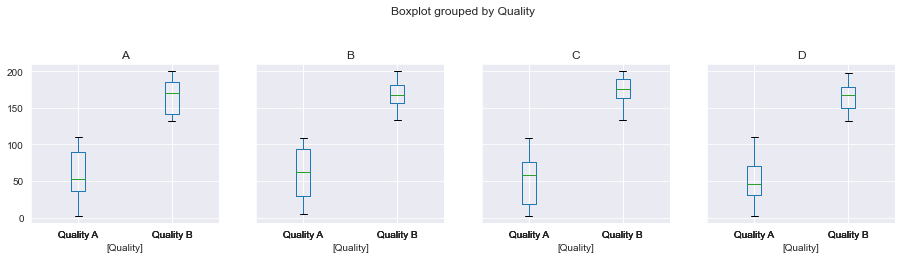

In [253]:
compwithtarget.boxplot(by = 'Quality',  layout=(3,4), figsize=(15, 10));

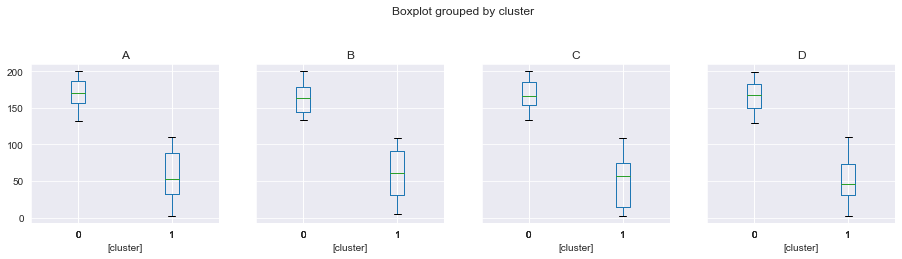

In [254]:
compwithcluster.boxplot(by = 'cluster',  layout=(3,4), figsize=(15, 10));

## The median and the std deviations of the original categorical column and the clusters that we have created are very similar. The cluster group 0 is similar Quality A and group 1 is similar to Quality B

In [255]:
compwithtarget.groupby(by ='Quality').mean()

,A,B,C,D
Quality,,,,
Quality A,58.769231,62.230769,53.000000,51.807692
Quality B,167.176471,168.470588,173.470588,165.411765


In [256]:
compwithcluster.groupby(by ='cluster').mean()

,A,B,C,D
cluster,,,,
0,169.30303,163.909091,168.666667,166.606061
1,58.75000,60.928571,49.750000,53.000000


* ## The Mean of column A for both the new clusters and the old categorical variables are almost the same.
* ## The Mean of column B for both the new clusters and the old categorical variables are almost the same. Slight variation is there this might be due to the missing values in the Quality variable.
* ## The Mean of column C for both the new clusters and the old categorical variables are almost the same. Slight variation is there this might be due to the missing values in the Quality variable.
* ## The Mean of column D for both the new clusters and the old categorical variables are almost the same.

* # We can now replace the Quality column with the clusters that we have created as they share similar characteristics and also drop the Quality column as there are missing values in it.

In [257]:
company['cluster'].replace([1,0],['Quality A','Quality B'],inplace = True)

In [258]:
company.drop(['Quality'],axis = 1,inplace = True)

In [259]:
company.head()

,A,B,C,D,cluster
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,Quality B
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


# PART THREE PROJECT BASED

* ### DOMAIN: Automobile 
* ### CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. 

In [260]:
# importing the data to a dataframe

vehicle = pd.read_csv("Part3 - vehicle.csv")

In [261]:
# exploring the shape of the data

vehicle.shape

(846, 19)

In [262]:
# checking the nulls in the data as well as its datatypes

vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [263]:
# checking for nulls in the dataset

vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [264]:
# replacing all the null values in the dataframe with the median of their respective columns

collist = ['circularity','distance_circularity','radius_ratio','pr.axis_aspect_ratio','scatter_ratio',
          'elongatedness','pr.axis_rectangularity','scaled_variance','scaled_variance.1','scaled_radius_of_gyration',
          'scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2']
for col in collist:
    vehicle[col].fillna(vehicle[col].median(),inplace = True)

In [265]:
vehicle.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


* ## compactness:
  The mean and median values are equal. The min value is 73 and the max value is 119 which is slightly greater than the 75 percent. The data follows a normal distribution.
  
* ## circularity:
  The mean and median values are equal. The min value is 33 and the max value is 59 which is slightly greater than the 75 percent. The data follow a normal distribution.
  
* ## distance_circularity
  The mean and the median values are almost equal. The min value is 40 and the max value is 112 which is closer to 112. The data follows a normal distribution with no outliers.
  
* ## radius_ration:
  The mean and median values are almost equal. The min value is 33 and the max value is 333. The max value is very much greater than the 75 percent value and this might indicate that there might be few outliers and the it is skewed to the right.

* ## pr.axis_aspect_ratio:
  The mean and median values are equal. The min value is 47 and the max value is 138 which is far greater than the 75 percent value. There might be outliers and the data is slightly skewed to the right
  
* ## max.length_aspect_ratio:
  The mean and median values are equal. The min value is 2 and the max value is 55 which is greater than the 75 percent value of 10. The data is skewed to the right with outliers.
  
* ## scatter_ratio:
  The mean is greater than the median. The min value is 112 and max value is 265ich is slightly greater than 198. The data is skewed to the right.
  
* ## elongatedness:
  The mean and the median values are equal. The min value is 26 and the max value is 61 which is slightly greater than 75 percent value of 46. The data is might have some outliers towards the right side.
 
* ## pr.axis_rectangularity:
  The mean and the median values are equal. The min value is 17 and the max value is 29 which is slightly greater than 75 percent value of 23. The data follows a normal distribution.
  
* ## max.length_rectangularity:
  The mean and the median values are equal. The min value is 118 and the max value is 188 which is slightly greater than 75 percent value of 159. The data follows a normal distribution.
 
* ## scaled_variance:
  The mean is greater than the median. The min value is 130.0 and the max value is 320.0 which is greater than 75 percent value of 217.00. The data is skewed to the right with many outliers.


* ## scaled_variance.1:
  The mean is greater than the median. The min value is 184.0 and the max value is 1018.0 which is greater than 75 percent value of 586.75. The data is skewed to the right with many outliers.


* ## scaled_radius_of_gyration:
  The mean and the median values are equal. The min value is 109.0 and the max value is 268.0 which is greater than 75 percent value of 198.00. The data is skewed to the right has has outliers.

* ## scaled_radius_of_gyration.1:
  The mean and the median values are equal. The min value is 59.0 and the max value is 135.0 which is greater than 75 percent value of 75.00. The data might have few ouliers.


* ## skewness_about:
  The mean and the median values are equal. The min value is 0.0 and the max value is 22.0 which is greater than 75 percent value of 9.00. The data might have few ouliers on the right side


* ## skewness_about.1:
  The mean and the median values are equal. The min value is 0.0 and the max value is 41.0 which is greater than 75 percent value of 19.00. The data might have few ouliers on the right side

* ## skewness_about.2:
  The mean and the median values are equal. The min value is 176.0 and the max value is 206.0 which is greater than 75 percent value of 193.00. The data is normally distributed


* ## hollows_ratio:
  The mean and median values are almost equal. The min value is 181.0 and the max value is 211.0 which is slightly greater than 75 percent value of 201.00. The data is normally distributed with no skewness
  

In [266]:
display(vehicle['class'].value_counts(), vehicle['class'].value_counts(normalize = True)*100)

car    429
bus    218
van    199
Name: class, dtype: int64

car    50.709220
bus    25.768322
van    23.522459
Name: class, dtype: float64

# Univariate analysis

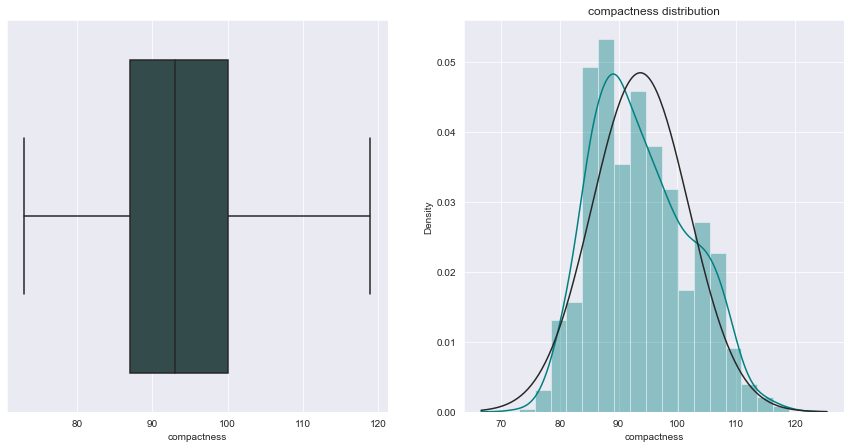

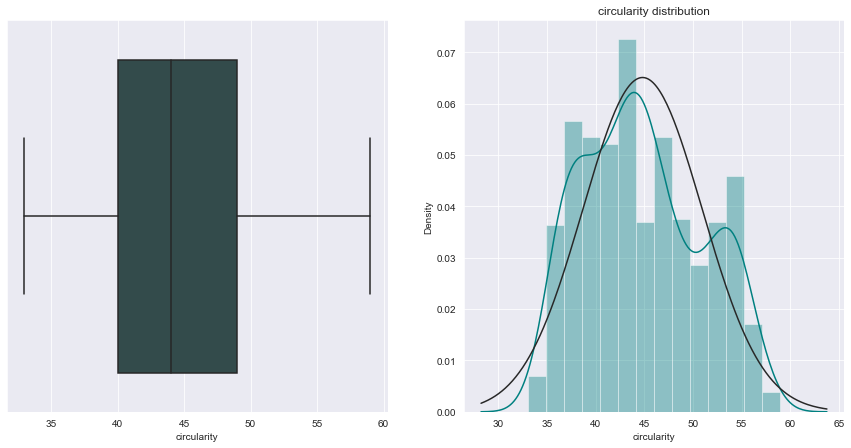

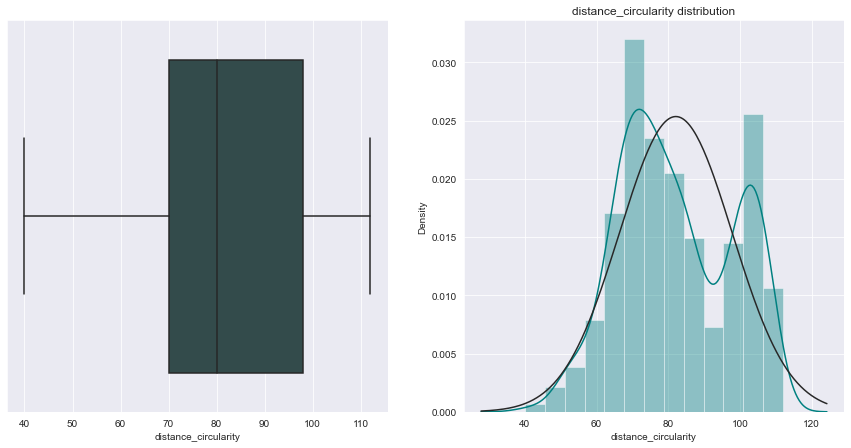

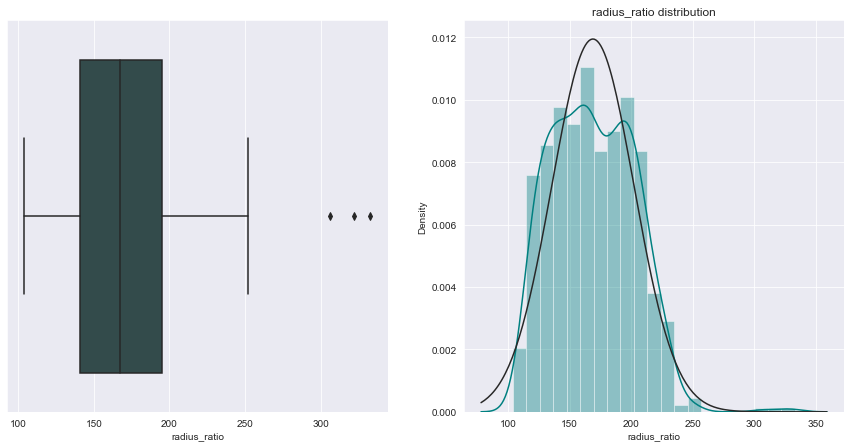

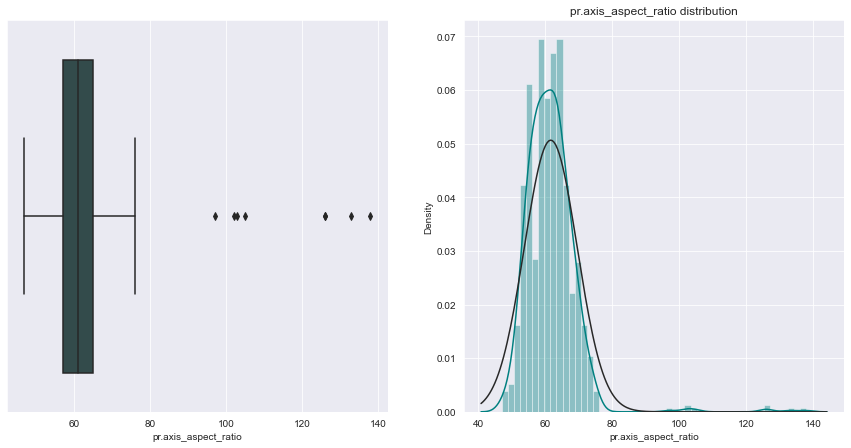

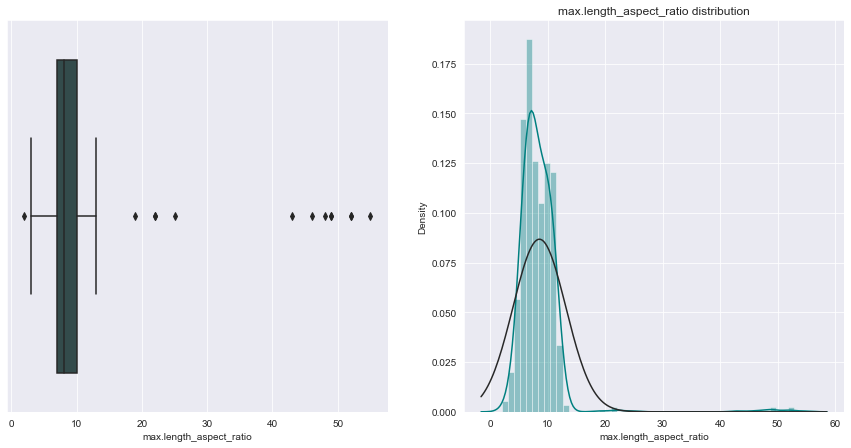

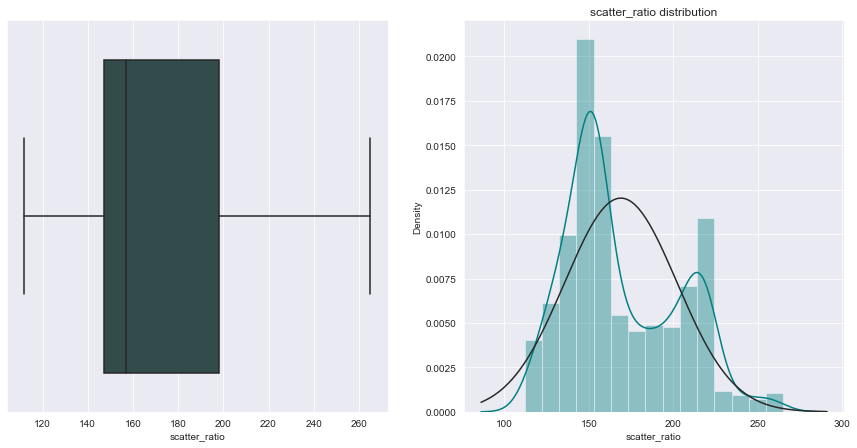

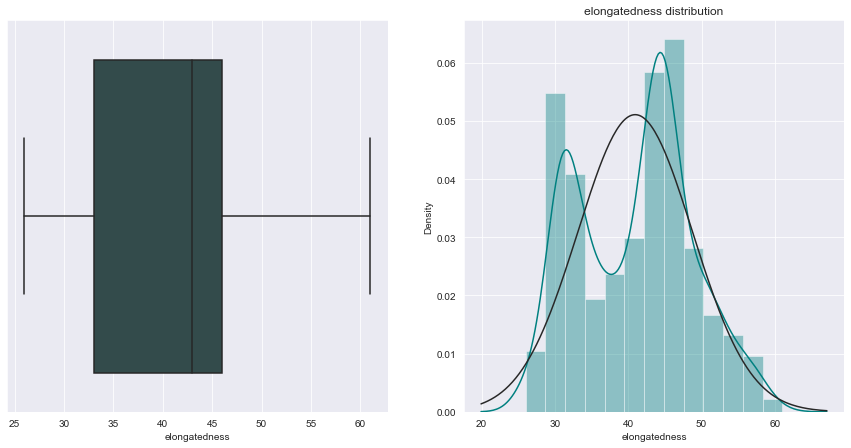

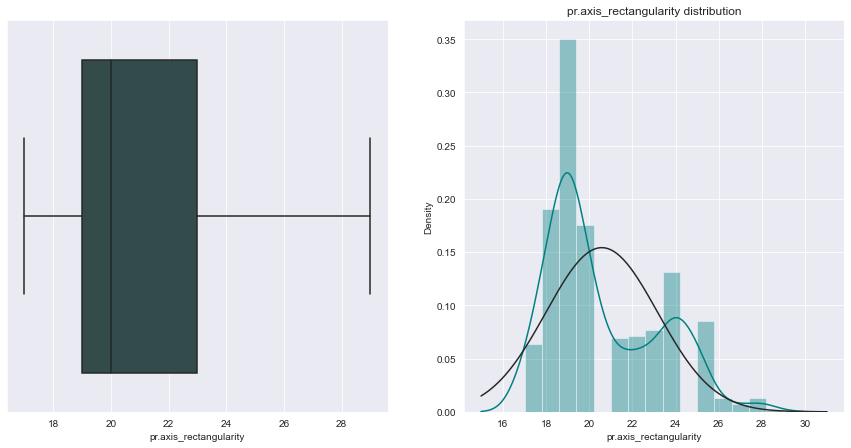

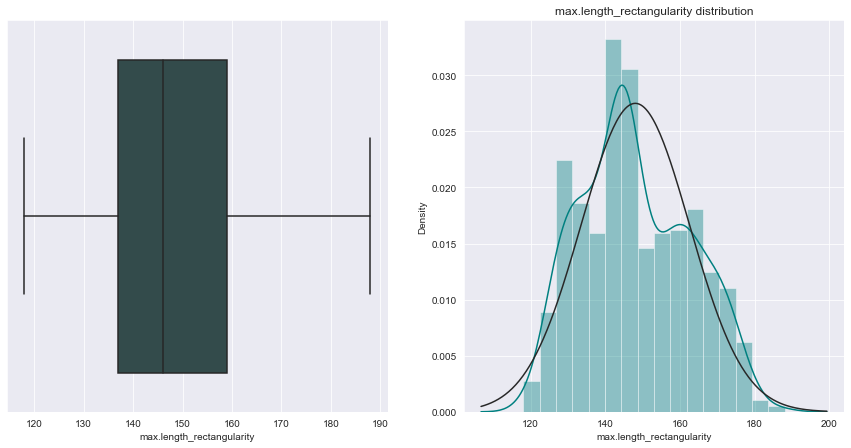

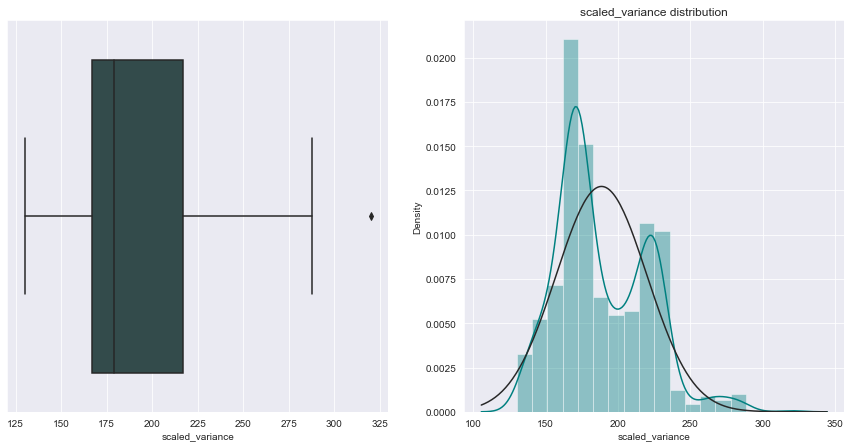

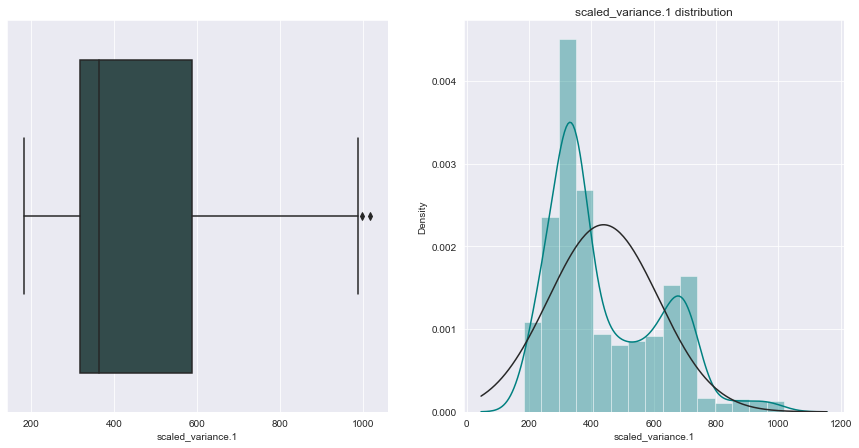

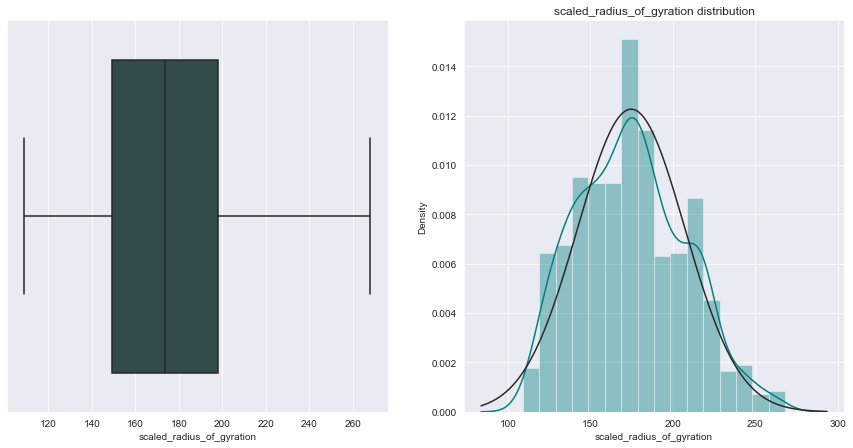

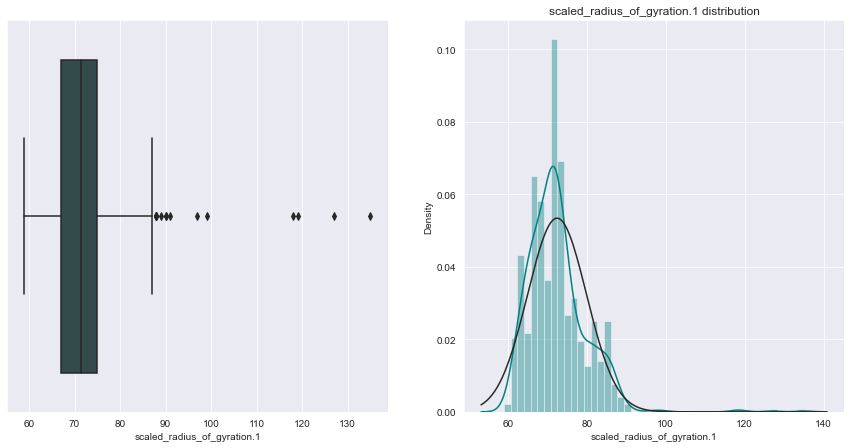

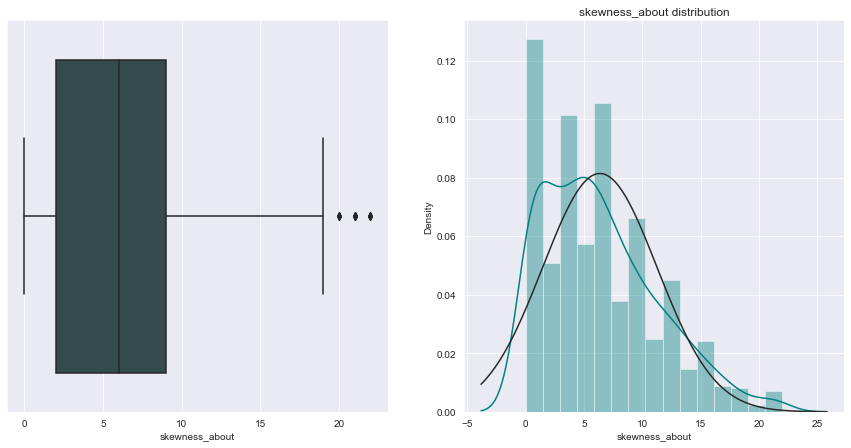

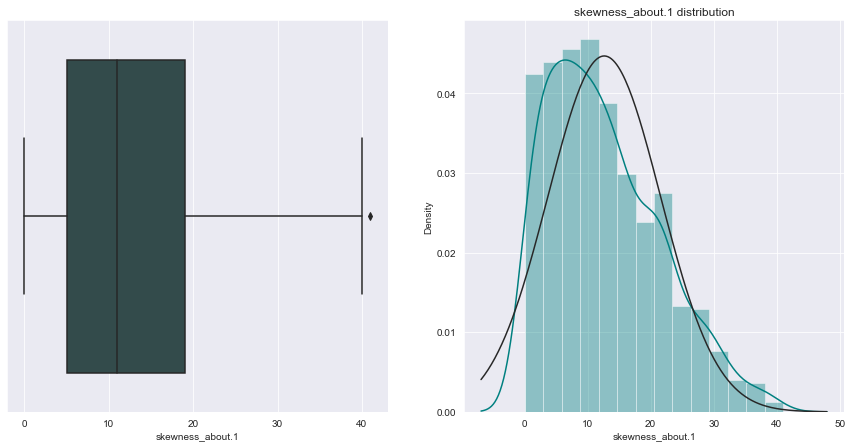

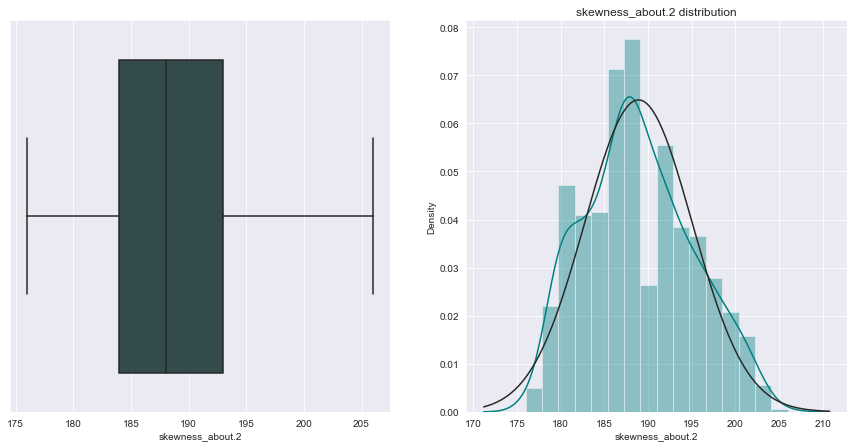

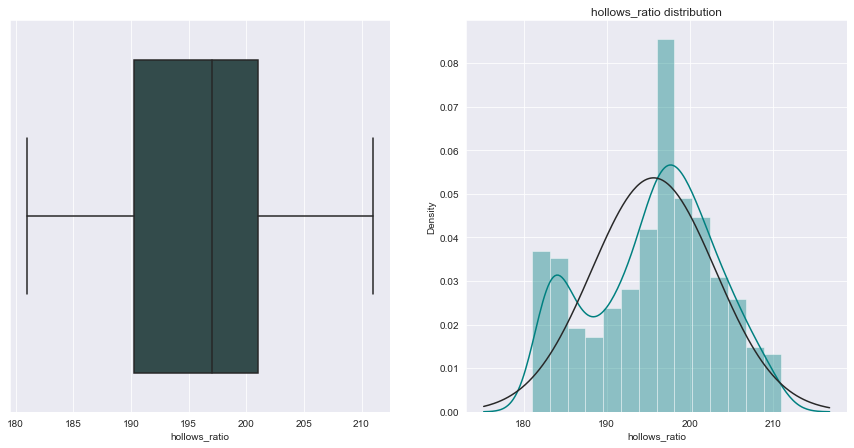

In [267]:
boxplotcolumns = ['compactness',
 'circularity',
 'distance_circularity',
 'radius_ratio',
 'pr.axis_aspect_ratio',
 'max.length_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'scaled_radius_of_gyration.1',
 'skewness_about',
 'skewness_about.1',
 'skewness_about.2',
 'hollows_ratio']
for cols in boxplotcolumns:
    f,(ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))
    sns.boxplot(x = cols, data = vehicle, ax = ax1, orient = 'v', color = 'darkslategrey')
    sns.distplot(vehicle[cols], ax = ax2, color = 'teal', fit = norm).set_title(f'{cols} distribution')

* ## compactness:
    The data has a normal distribution with no outliers
* ## circularity:
    The data has a normal distribution with no ouliers
* ## distance_circularity:
    The data is skewed to the left and has no outliers
* ## radius_ratio:
    The data is normally distributed and has outliers towards the right side
* ## pr.axis_aspect_ratio
    The data is normally distributed and has outliers towards the right side
* ## max.length_aspect_ratio:
    The data has outliers on the both sided. The ouliers on the right side is greater than that of the left side of the distribution
* ## scatter_ratio:
    The data is skewed to the right and has no outliers
* ## elongatedness:
    The data has 2 distinct peaks and is skewed to the right with no ouliers
* ## pr.axis_rectangularity:
    The data has a single peak and is skewed to the right
* ## max.length_rectangularity:
    The data almost follows a normal distribution
* ## scaled_variance:
    The data has a single peak and it is also skewed to the right with an outlier
* ## scaled_variance.1:
    The data has a single peak and it is also skewed to the right with two outliers
* ## scaled_radius_of_gyration:
    The data follows a normal distribution
* ## scaled_radius_of_gyration.1:
    The data has a single peak and is heavily skewed to the righ with many outliers
* ## skewness_about:
    The data has multiple peaks and is skewed to the right with outliers
* ## skewness_about.1:
    The data almost follows a normal distribution and is skewed to the right with outliers
* ## skewness_about.2:
    The data follows a normal distribution with no outliers
* ## hollows_ratio:
    The data has a single peak and almost follows a normal distribution with slight skewness to the left

# Bi-Variate analysis

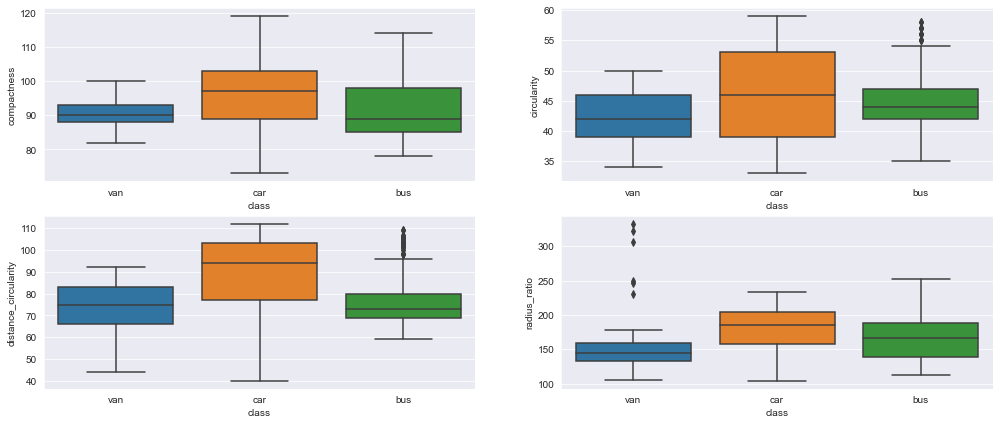

In [268]:
f, axes = plt.subplots(2, 2, figsize=(17,7))
sns.boxplot(x = 'class',y = 'compactness',data = vehicle, ax=axes[0][0]);
sns.boxplot(x = 'class',y = 'circularity',data = vehicle,  ax=axes[0][1]);
sns.boxplot(x = 'class',y = 'distance_circularity',data = vehicle,  ax=axes[1][0]);
sns.boxplot(x = 'class',y = 'radius_ratio',data = vehicle,  ax=axes[1][1]);
plt.show()

* ## Van:
    The class van has low mean for all of the above columns
* ## Car:
    The class car has higher mean when compared to van and bus for all of the above columns
* ## Bus:
    The class bus has higher similar mean with van on distance_circularity and compactness. This is due to the size of the van and bus being very similar. The mean of bus is higher when compared with van on ciruclarity and radius_ration

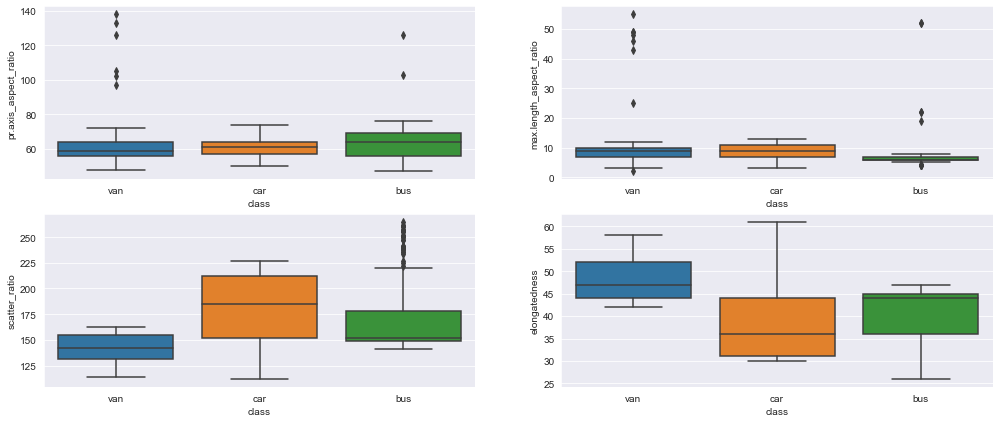

In [269]:
f, axes = plt.subplots(2, 2, figsize=(17,7))
sns.boxplot(x = 'class',y = 'pr.axis_aspect_ratio',data = vehicle, ax=axes[0][0]);
sns.boxplot(x = 'class',y = 'max.length_aspect_ratio',data = vehicle,  ax=axes[0][1]);
sns.boxplot(x = 'class',y = 'scatter_ratio',data = vehicle,  ax=axes[1][0]);
sns.boxplot(x = 'class',y = 'elongatedness',data = vehicle,  ax=axes[1][1]);
plt.show()

* ## Van:
    The class van has almost the same mean when compared to the class car and class bus in the pr.axis_aspect_ratio and max.length_aspect_ratio. The mean of van is higher than all the other classes in elongatedness and has the lowest mean in scatter_ratio.
*  ## Car:
    The class car has almost the same mean when compared to the class van and class bus in the pr.axis_aspect_ratio and max.length_aspect_ratio. Class car has the highest mean in scatter_ration and the lowest mean in elongatedness
* ## Bus:
    The class Bus has almost the same mean when compared to the class car and van bus in the pr.axis_aspect_ratio and max.length_aspect_ratio. Bus has higher mean than van in scatter_ration and higher mean than car in elongatedness

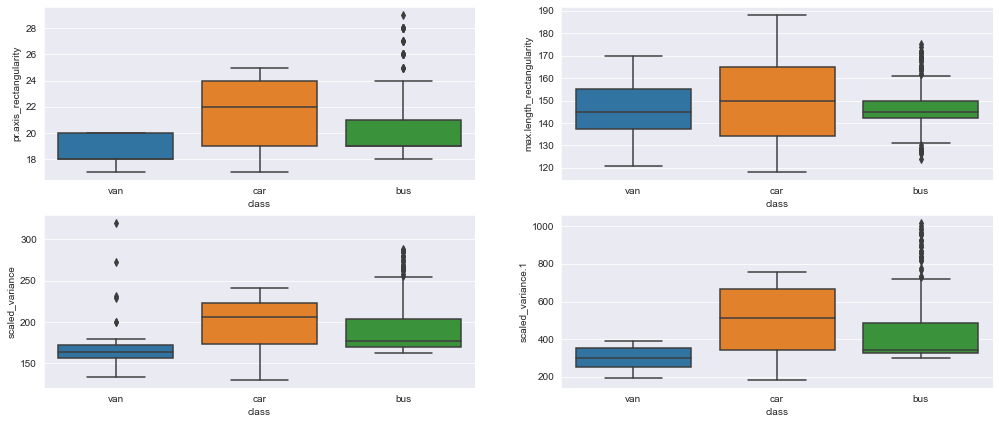

In [270]:
f, axes = plt.subplots(2, 2, figsize=(17,7))
sns.boxplot(x = 'class',y = 'pr.axis_rectangularity',data = vehicle, ax=axes[0][0]);
sns.boxplot(x = 'class',y = 'max.length_rectangularity',data = vehicle,  ax=axes[0][1]);
sns.boxplot(x = 'class',y = 'scaled_variance',data = vehicle,  ax=axes[1][0]);
sns.boxplot(x = 'class',y = 'scaled_variance.1',data = vehicle,  ax=axes[1][1]);
plt.show()

* ## Van:
    Class van has the lowest in almost all of the above variables
* ## Car:
    Class car has the highest mean in almost all of the above variables
* ## Bus:
    Bus has higher mean when compared to van in almost all of the variables

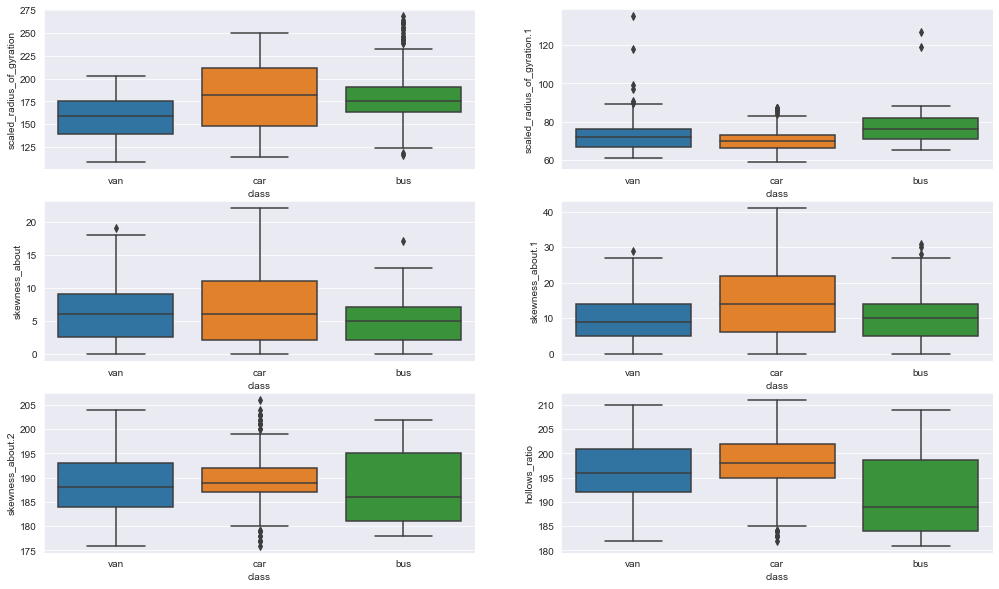

In [271]:
f, axes = plt.subplots(3, 2, figsize=(17,10))
sns.boxplot(x = 'class',y = 'scaled_radius_of_gyration',data = vehicle, ax=axes[0][0]);
sns.boxplot(x = 'class',y = 'scaled_radius_of_gyration.1',data = vehicle,  ax=axes[0][1]);
sns.boxplot(x = 'class',y = 'skewness_about',data = vehicle,  ax=axes[1][0]);
sns.boxplot(x = 'class',y = 'skewness_about.1',data = vehicle,  ax=axes[1][1]);
sns.boxplot(x = 'class',y = 'skewness_about.2',data = vehicle,  ax=axes[2][0]);
sns.boxplot(x = 'class',y = 'hollows_ratio',data = vehicle,  ax=axes[2][1]);
plt.show()

* ## Van:
    Class van has equal mean when compared to all the other classes for almost all of the variables except skewness_about.1
* ## Car:
    Class car has higher mean when compared to all the other classes in all of the above variables
* ## Bus:
    Bus has the lowest mean among the classes

# Multi-variate analysis

Text(0.5, 1.0, 'Correlation Matrix of Data')

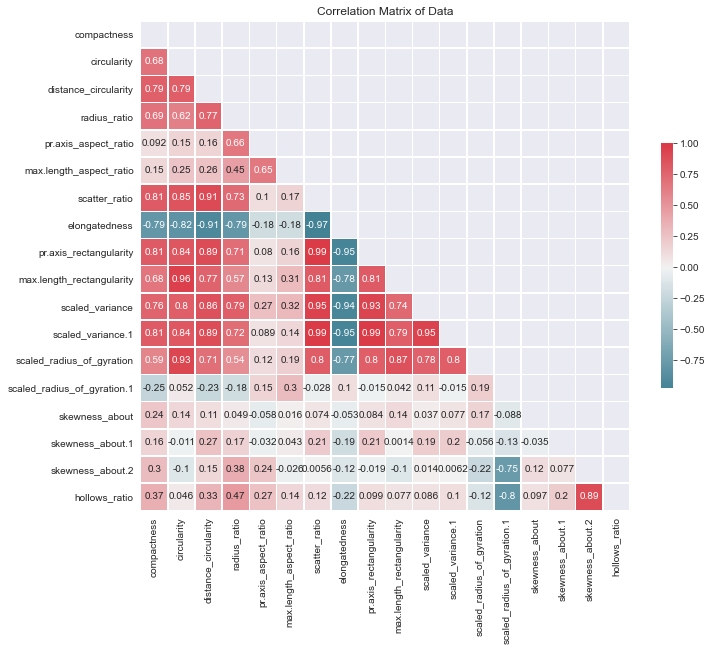

In [272]:
corr = vehicle.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix of Data')

* ### compactness:
	It has strong positive correlation with circularity,distance_circularity,radius_ratio,scatter_ratio, pr.axis_rectangularity,scaled_variance,sacled_variance.1,scaled_radius_of_gyration. It has strong negative correlation with elongatedness


* ### circularity:
	It has strong positive correlation with distance_circularity,radius_ration,scatter_ratio,pr.axis_rectangularity,max.lenght_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration. It has strong negative correlation wiht elongatedness

* ### distance_circularity:
	It has strong positive correlation with radius_ratio,scatter_ratio,pr.axis_rectangularity,max.lenght_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration. It has strong negative correlation with elongatedness

* ### radius_ratio:
	It has strong postive correlation with pr.axis_aspect_ratio,scatter_ratio,pr.axis_rectangularity, max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration. It has strong negative correlation with elongatedness

* ### pr.axis_aspect_ratio:
	It has strong postive correlation with maxlenght_aspect_ratio and radius_ratio. It has weak positive correlation with all the other variable. It has weak negative correlation with elongatedness

* ### max.length_aspect_ratio:
	It has strong postiive correlation with pr.axis_aspect_ratio. It has weak positive correlation with all the other variables. It has weak negative correlation with elongatedness

* ### scatter_ratio:
	It has strong negative correlation with elongatedness. It has strong positive correlation with pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration

* ### elongatedness:
	It has strong negative correlation with all of the variables

* ### pr.axis_rectangularity:
	It has strong positive correlation with max.length_rectangularity,scaled_variance,sacled_variance.1 and scaled_radius_of_gyration.

* ### max.length_rectangularity:
	It has strong positive correlation with scaled_variance, scaled_variance.1, scaled_radius_of_gyration.

* ### scaled_variance:
	It has strong positive correlation with scaled_variance.1, scaled_radius_of_gyration

* ### scaled_variance.1:
	It has strong positive correlation scaled_radius_of_gyration.

* ### scaled_radius_of_gyration:
	It is weekly correlated with almost all the variables.

* ### scaled_radius_of_gyration.1:
	It is has strong negative correlation with skewness_about.2 and hollows_ratio

* ### skewness_about:
	It has weak correlation with almost all of the variables

* ### skewness_about.1:
	It has weak correlation with almost all of the variables  

* ### skewness_about.2:
	It has strong positive correlation with hollows_ratio
	

In [273]:
# converting the strings to numbers

replace_struc = {'car': 3, 'bus': 2, 'van': 1}
vehicle['class'] = vehicle['class'].map(replace_struc)

In [274]:
# Absolute correlation of independent variables with the target variable
absCorrwithDep = []
allVars = vehicle.drop('class', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(vehicle['class'].corr(vehicle[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
7,elongatedness,0.483027
6,scatter_ratio,0.463566
8,pr.axis_rectangularity,0.444586
11,scaled_variance.1,0.443226
2,distance_circularity,0.428523
10,scaled_variance,0.407685
3,radius_ratio,0.402095
0,compactness,0.297774
15,skewness_about.1,0.271465
1,circularity,0.251281


* ## Almost all the variables have good correlation with the variable Class

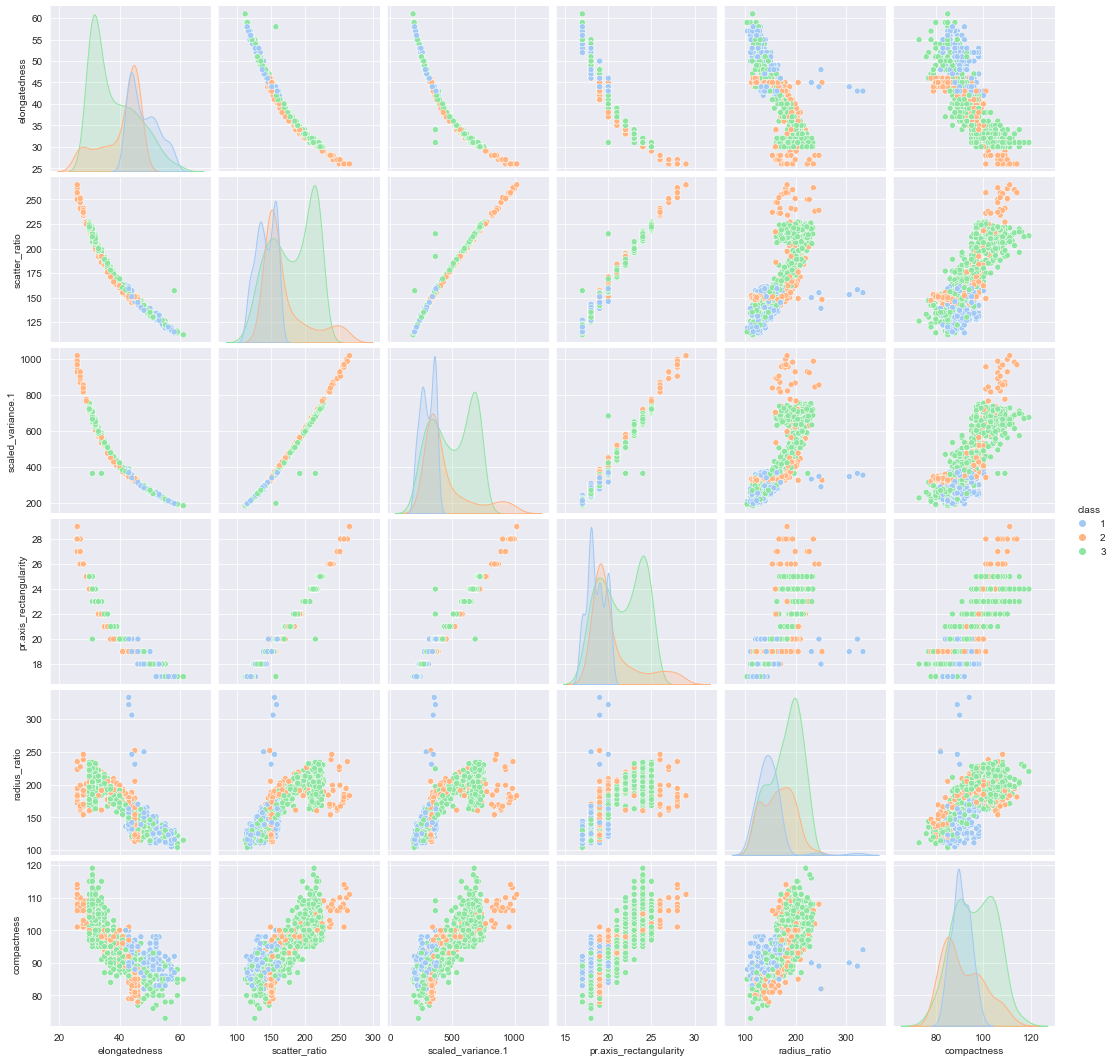

In [275]:
sns.pairplot(vehicle[['elongatedness', 'scatter_ratio', 'scaled_variance.1', 
             'pr.axis_rectangularity', 'radius_ratio', 'compactness', 'class']], hue = 'class',palette = "pastel")

* ## The diagonals represent the distribution of each variables
* ## Almost all of these variables have linear relationship with one another.

* ## explain this is detail

In [276]:
# replacing the outliers in each of these columns with the mean value

col=['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance', 'scaled_variance.1',
                  'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']
for c in col:
    #getting upper lower quartile values
    q25,q75=np.percentile(vehicle[c],25),np.percentile(vehicle[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    #taking mean of a column without considering outliers
    df_include = vehicle.loc[(vehicle[c] >= lower) & (vehicle[c] <= upper)]
    mean=int(df_include[c].mean())
    #imputing outliers with mean
    vehicle[c]=np.where(vehicle[c]>upper,mean,vehicle[c])
    vehicle[c]=np.where(vehicle[c]<lower,mean,vehicle[c])

In [277]:
# Seperating the target and the predictor variables

X = vehicle.drop(['class'],axis = 1)
y = vehicle['class']

In [278]:
# scaling the predictor variables

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_s = pd.DataFrame(data = X_scaled,columns = X.columns)

In [279]:
# splitting the data 

X_train,X_test,y_train,y_test = train_test_split(X_s,y,test_size = 0.20,random_state = 2)

In [280]:
# Using SVC classif

svc = SVC(random_state = 2)

params = {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['rbf']}

skf = StratifiedKFold(n_splits = 10, random_state = 2)
grid_svc = GridSearchCV(svc, param_grid = params, n_jobs = -1, cv = skf)

grid_svc.fit(X_train, y_train)

print('SVC Scores with Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', grid_svc.best_params_)
print('Best Score is: ', grid_svc.best_score_.round(3))

print('SVC accuracy for train set: {0:.3f}'.format(grid_svc.score(X_train, y_train)))
print('SVC accuracy for test set: {0:.3f}'.format(grid_svc.score(X_test, y_test)))

y_true, y_pred = y_test, grid_svc.predict(X_test)

# Cross Validation Score
grid_svc_score = cross_val_score(grid_svc, X_train, y_train, cv = skf, scoring = 'f1_macro')
print('SVC cross validation training score: ', round(grid_svc_score.mean(), 3).astype(str))

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

SVC Scores with Hyperparameter Tuning


Best Hyper Parameters are:  {'C': 1, 'kernel': 'rbf'}
Best Score is:  0.959
SVC accuracy for train set: 0.976
SVC accuracy for test set: 0.941
SVC cross validation training score:  0.955

Accuracy Score:
 0.941

              precision    recall  f1-score   support

           1       0.93      0.90      0.91        48
           2       0.98      0.98      0.98        49
           3       0.92      0.95      0.93        73

    accuracy                           0.94       170
   macro avg       0.94      0.94      0.94       170
weighted avg       0.94      0.94      0.94       170


Confusion Matrix:
 [[43  0  5]
 [ 0 48  1]
 [ 3  1 69]]


* ## The model is fitted with the raw data which has about 18 columns. The training accuracy is at 97 percent and the test accuracy is at 94 percent and also the cross validation training score is at 95 percent. This model is a good fit model at it has a very good accuracy. The precision,recall and the f1-score of all the 3 classes of the target varaible are very good.

In [281]:
# calculating the covariance matrix

cov_matrix = np.cov(X_s.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.72274587  0.1930925   0.50051942
   0.81358214 -0.78968322  0.81465658  0.67694334  0.77083712  0.80933908
   0.58593517 -0.24594949  0.19754181  0.15658904  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63908238  0.20349327  0.5611334
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80388423  0.83076625
   0.92691166  0.06911899  0.13651201 -0.00973953 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.79518245  0.24462154  0.66759792
   0.90614687 -0.9123854   0.89408198  0.77544391  0.87072431  0.88666518
   0.70660663 -0.22858843  0.09922417  0.26282025  0.14627113  0.33312625]
 [ 0.72274587  0.63908238  0.79518245  1.00118343  0.65132274  0.46450248
   0.77080917 -0.82633716  0.74496895  0.58023162  0.78729174  0.76167966
   0.5514712  -0.39120209  0.03574546  0.17989116  0.40627229  0.49232718]
 [ 0.1930925   0.20349327  0.24462154  0.65132274  1.00118343  0.15047265
   0.19442484

In [282]:
# calculating the eigen values and eigen vectors from the covariance matrix

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-2.72456760e-01 -8.71984206e-02  3.74743268e-02  1.38919557e-01
  -1.37300856e-01  2.63187597e-01  2.04590029e-01 -7.54759913e-01
   3.71638022e-01  1.70228210e-01  7.07598289e-02  2.34832689e-02
  -1.82941336e-02 -6.82046373e-02 -8.34579841e-02 -8.05752788e-02
   5.52669488e-02  6.06008579e-02]
 [-2.87239441e-01  1.31362863e-01  2.01407485e-01 -3.74947252e-02
   1.39093208e-01 -7.11117583e-02 -3.92094217e-01 -6.79789475e-02
   5.65560238e-02 -1.85871398e-01 -1.31967349e-02  1.43111670e-01
  -4.80653794e-02 -5.04131279e-02 -3.32659057e-01  1.49602943e-01
  -6.12197951e-01  3.23141777e-01]
 [-3.02352894e-01 -4.63589607e-02 -6.39036014e-02  1.08650741e-01
   8.02442154e-02 -1.71393542e-02  1.63404457e-01  2.76628483e-01
   6.02935009e-02  3.02201986e-01  4.69614599e-01  6.46404015e-01
   4.96756329e-03  1.42400270e-01  9.06697435e-02  1.31638820e-01
  -4.89388639e-03 -3.70685904e-02]
 [-2.69606836e-01 -1.98392687e-01 -5.52503863e-02 -2.54340082e-01
  -1.33324839e-01 -

In [283]:
# calculating the cummulative sum of the eigen values of the eigen vectors

tot = sum(eig_vals)
var_exp = [(i /tot) * 100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

print('Cumulative Variance Explained', cum_var_exp)

Cumulative Variance Explained [ 54.11957049  72.70632985  79.32285761  85.61378506  90.52066068
  94.21900666  95.98336476  97.25227957  97.98795495  98.43068607
  98.83570311  99.19159399  99.41300544  99.58795553  99.74622443
  99.8630005   99.97207541 100.        ]


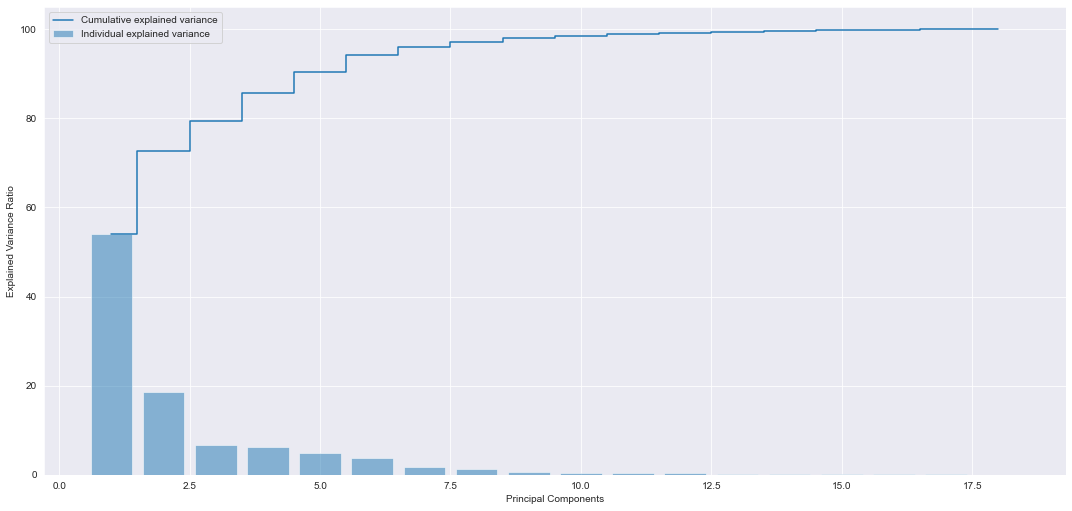

In [284]:
plt.figure(figsize = (15 , 7.2))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where = 'mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

* ## The graph above shows the amount of variance captured by all of the principal components. We will be using the top 13 principal component as we want to capture as much of the information. All the other principal components don't have siginificant variance so we will leave them out.

In [285]:
# fitting the pca on the data

pca = PCA(n_components = 13, random_state = 2)
pca.fit(X_s)
xpca13 = pca.fit_transform(X_s)

In [286]:
# splitting the pca components for train and test

X_train_pca,X_test_pca,y_train,y_test = train_test_split(xpca13,y,test_size = 0.20,random_state = 2)

In [287]:
# Using the svc algorithm on the newly created pca components

svc_pca = SVC(random_state = 2)

params = {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['rbf']}

skf = StratifiedKFold(n_splits = 10, random_state = 2)
grid_svc_pca = GridSearchCV(svc_pca, param_grid = params, n_jobs = -1, cv = skf)

grid_svc_pca.fit(X_train_pca, y_train)

print('SVC Scores with Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', grid_svc_pca.best_params_)
print('Best Score is: ', grid_svc_pca.best_score_.round(3))

print('SVC accuracy for train set: {0:.3f}'.format(grid_svc_pca.score(X_train_pca, y_train)))
print('SVC accuracy for test set: {0:.3f}'.format(grid_svc_pca.score(X_test_pca, y_test)))

y_true, y_pred = y_test, grid_svc_pca.predict(X_test_pca)

# Cross Validation Score
grid_svc_pca_score = cross_val_score(grid_svc_pca, X_train_pca, y_train, cv = skf, scoring = 'accuracy')
print('SVC cross validation training score: ', round(grid_svc_pca_score.mean(), 3).astype(str))

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

SVC Scores with Hyperparameter Tuning


Best Hyper Parameters are:  {'C': 1, 'kernel': 'rbf'}
Best Score is:  0.957
SVC accuracy for train set: 0.970
SVC accuracy for test set: 0.941
SVC cross validation training score:  0.956

Accuracy Score:
 0.941

              precision    recall  f1-score   support

           1       0.93      0.90      0.91        48
           2       0.98      0.98      0.98        49
           3       0.92      0.95      0.93        73

    accuracy                           0.94       170
   macro avg       0.94      0.94      0.94       170
weighted avg       0.94      0.94      0.94       170


Confusion Matrix:
 [[43  0  5]
 [ 0 48  1]
 [ 3  1 69]]


* ## The train and the test accuracy of the model fitted on the PCA components are almost equal to the model fitted with raw data which has 18 columns. The Cross validation score, precision,recall and f1-score of all the classes are very good and almost the same as the model with the old variables

* ## Dimensionality Reduction has helped us to create the model with less number of features (i.e) from 18 features to 13 features, while doing so we have mainted the accuracy of the model without any drops in its performance. For an algorithm like SVC it is very important that we use smaller no of features because it will directly impact while fitting the model. When faced with large volumes of data with huge number of columns, dimensionality reduction techniques will be very helpful in reducing the number of features while not having any performance issues

# PART FOUR PROJECT BASED

* ### DOMAIN: Sports management 
* ### CONTEXT: Company X is a sports management company for international cricket. 

In [288]:
# importing the data into a dataframe

ipl = pd.read_csv("Part4 - batting_bowling_ipl_bat.csv",index_col='Name')

In [289]:
# exploring the shape of the data

ipl.shape

(180, 6)

In [290]:
# selecting the top 20 records in the dataframe

ipl.head(20)

,Runs,Ave,SR,Fours,Sixes,HF
Name,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN
CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN
G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN
V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN
CL White,479.0,43.54,149.68,41.0,20.0,5.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [291]:
# we will drop all the rows which has null values as they are empty rows

ipl.dropna(axis = 0,how='all',inplace = True)

In [292]:
# checking the null of the dataset

ipl.isnull().sum()

Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

In [293]:
# checking the data type and nulls of the dataframe

ipl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, CH Gayle to R Sharma
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Runs    90 non-null     float64
 1   Ave     90 non-null     float64
 2   SR      90 non-null     float64
 3   Fours   90 non-null     float64
 4   Sixes   90 non-null     float64
 5   HF      90 non-null     float64
dtypes: float64(6)
memory usage: 4.9+ KB


In [294]:
# reseting the index

ipl.reset_index(inplace = True)

In [295]:
ipl.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
1,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
2,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
3,CL White,479.0,43.54,149.68,41.0,20.0,5.0
4,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


# Uni-variate analysis

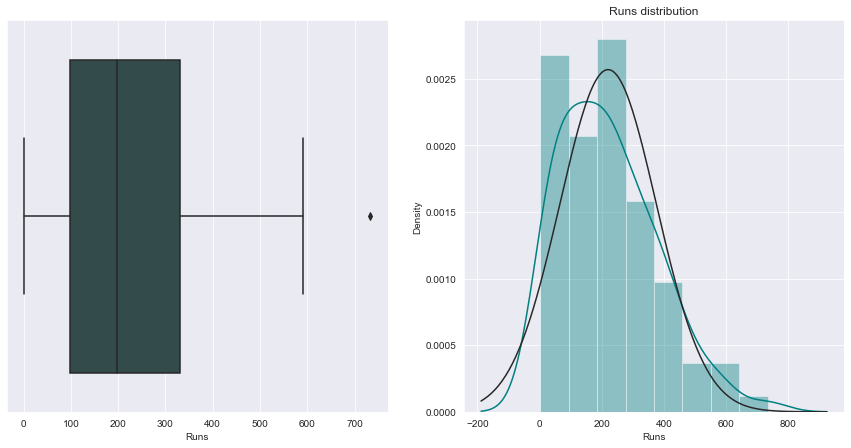

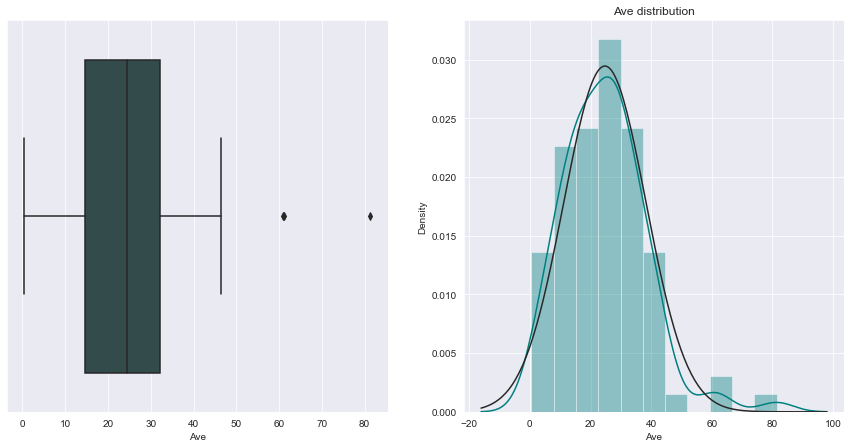

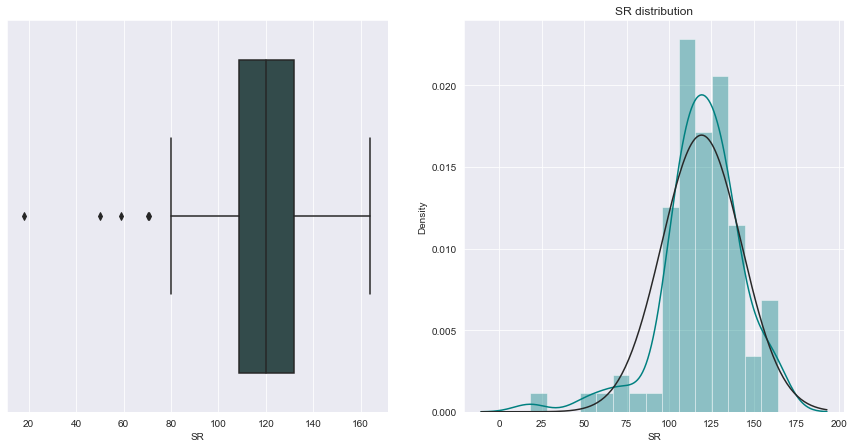

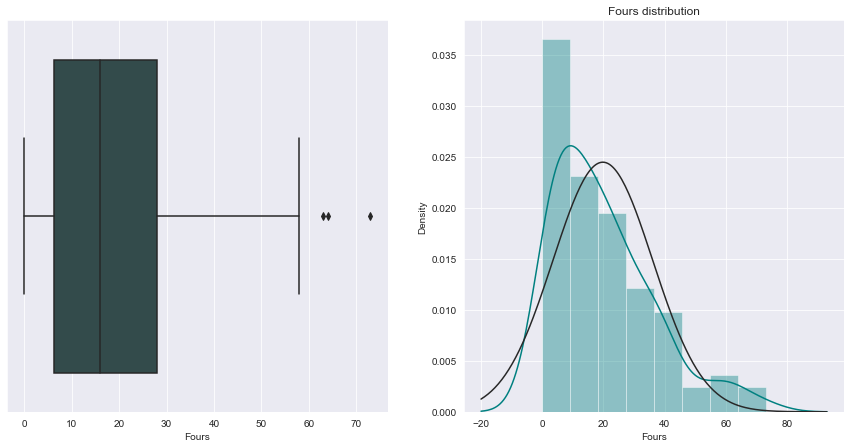

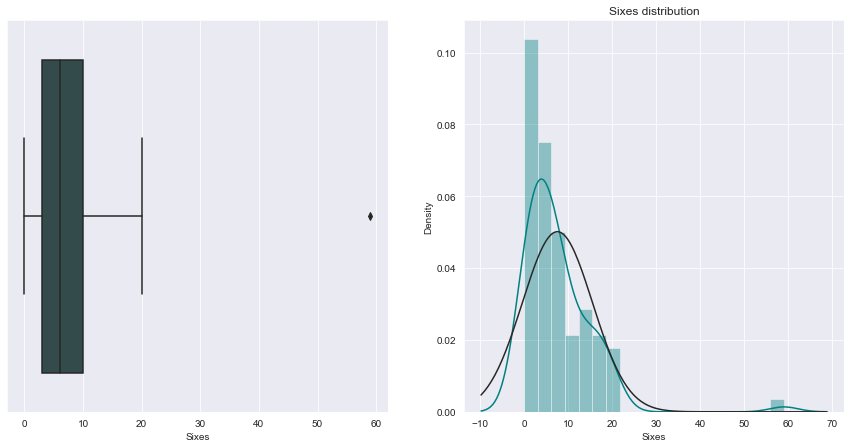

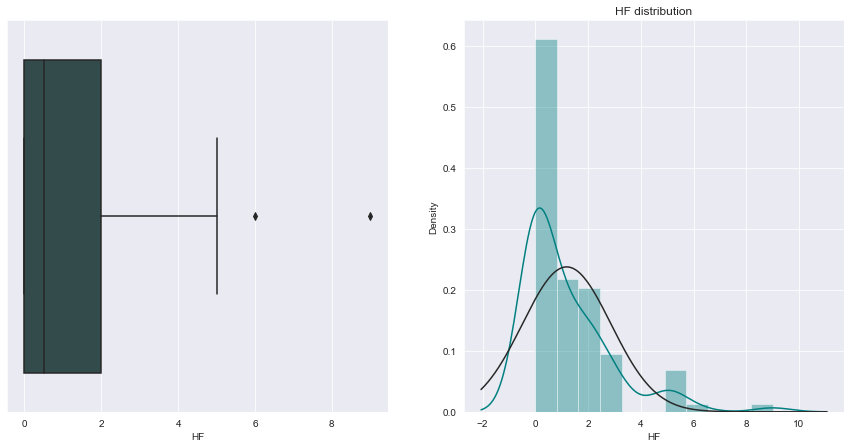

In [296]:
iplcols = ['Runs', 'Ave', 'SR', 'Fours', 'Sixes', 'HF']
for i in iplcols:
    f,(ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))
    sns.boxplot(x = i, data = ipl, ax = ax1, orient = 'v', color = 'darkslategrey')
    sns.distplot(ipl[i], ax = ax2, color = 'teal', fit = norm).set_title(f'{i} distribution')

* ## Runs:
    The data almost follows a normal distribution but has a single outlier
* ## Ave:
    The data is normally distributed with 2 outliers on its right side
* ## SR:
    The data is noramlly distributed with outliers on the left side. Could be due to the middle order or the lower order batsmen
* ## Fours:
    The data is skewed to the right with outliers.
* ## Sixes:
    The data is skewed to the right with one outlier
* ## HF:
    The data is skewed to the right with two ouliers

# Bi-variate analysis

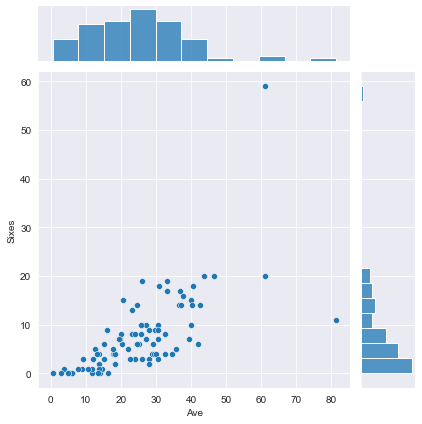

In [297]:
sns.jointplot(x='Ave',y = 'Sixes',data = ipl);

* ## Ave and sixes might have a slight positive correlation

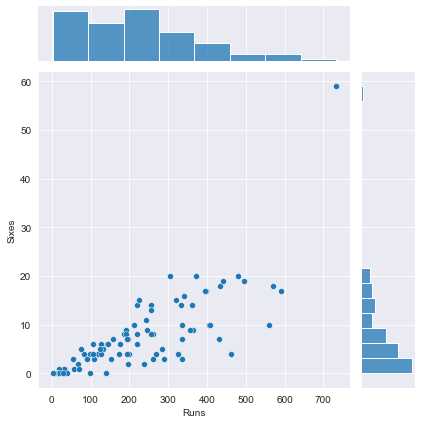

In [298]:
sns.jointplot(x='Runs',y = 'Sixes',data = ipl);

* ## Runs and sixes have a positive correlation

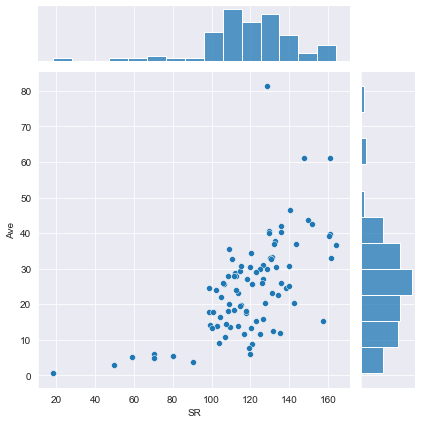

In [299]:
sns.jointplot(x='SR',y = 'Ave',data = ipl);

* ## SR and average have a slight postiive correlation

# Multi-variate Analysis

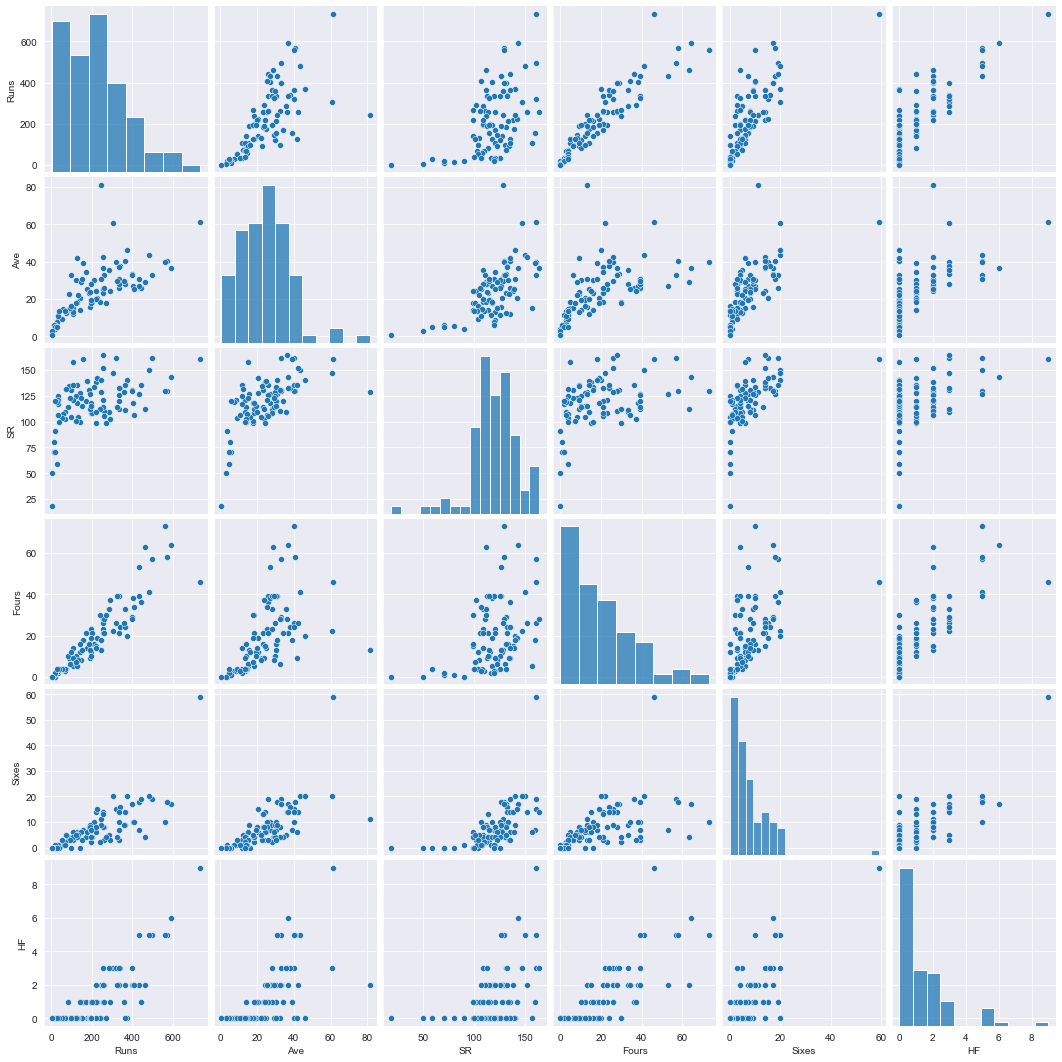

In [300]:
sns.pairplot(data = ipl);

Text(0.5, 1.0, 'Correlation Matrix of Data')

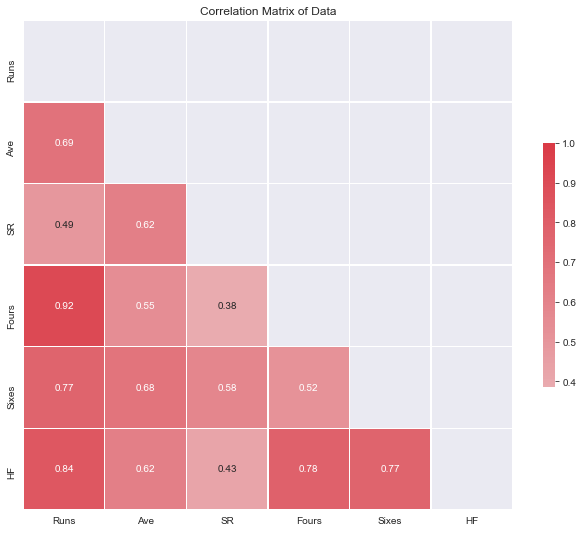

In [301]:
corr = ipl.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix of Data')

* ## HF:
    It has  high positive correlation with Runs, Fours and Sixes
* ## Sixes
    It has  high positive correlation with Runs,Ave and HF
* ## Fours
    It has high positive correlation with Runs and moderately correlated with Ave
* ## SR
    It is moderate correlation with all the variables
* ## Ave:
    It has high positive correlation with Runs

In [302]:
# dropping the Name column

ipl_df = ipl.drop(['Name'],axis = 1)

In [303]:
# scaling the columns

iplscaler = StandardScaler()
iplscaler.fit(ipl_df)
ipl_scaled = iplscaler.transform(ipl_df)
ipl_s = pd.DataFrame(data =ipl_scaled,columns = ipl_df.columns)

In [304]:
# creating cov varaince matrix of the dataframe

cov_matrix = np.cov(ipl_s.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.01123596 0.70077082 0.49903347 0.9291323  0.77842677 0.84453142]
 [0.70077082 1.01123596 0.63061271 0.55234856 0.69008186 0.62772842]
 [0.49903347 0.63061271 1.01123596 0.38913406 0.59050396 0.43238784]
 [0.9291323  0.55234856 0.38913406 1.01123596 0.52844526 0.79249429]
 [0.77842677 0.69008186 0.59050396 0.52844526 1.01123596 0.77632221]
 [0.84453142 0.62772842 0.43238784 0.79249429 0.77632221 1.01123596]]


In [305]:
# Getting the eigen vectors and eigen values from the covariance matrix

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.4582608  -0.26643209 -0.70483594 -0.45840889  0.10977942  0.00520142]
 [-0.39797313  0.33111756  0.0606373   0.10122837 -0.00550486 -0.84736307]
 [-0.3253838   0.69780334 -0.05624934  0.11890348  0.45013448  0.43275029]
 [-0.40574167 -0.47355804  0.58514214 -0.09676885  0.50823538  0.03252305]
 [-0.41733459  0.17902455  0.35786211 -0.39458014 -0.66942589  0.24878157]
 [-0.43237178 -0.27593225 -0.16096217  0.77486668 -0.28082541  0.17811777]]

 Eigen Values 
%s [4.30252561 0.83636692 0.01706297 0.16567829 0.41665751 0.32912443]


In [306]:
tot = sum(eig_vals)
var_exp = [(i /tot) * 100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

print('Cumulative Variance Explained', cum_var_exp)

Cumulative Variance Explained [ 70.91199612  84.696562    91.56369501  96.98815324  99.71877694
 100.        ]


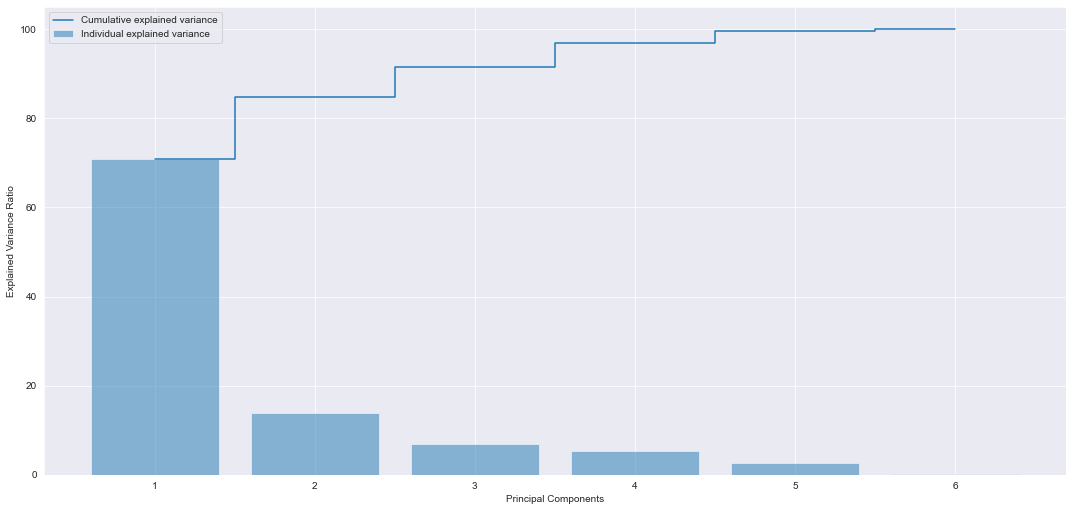

In [307]:
# plotting the cumulative variance of the eigen vectors

plt.figure(figsize = (15 , 7.2))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where = 'mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [308]:
# fitting the dataframe with 6 PCA

pca6 = PCA(n_components = 6)
pca6.fit(ipl_s)
ipl_pca = pca6.transform(ipl_s)

In [309]:
# creating a new dataframe with the pca values

pc = pd.DataFrame(data = ipl_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

In [310]:
# multiplying the eigen values with their respective datapoint in the new dimensional space

pc['prodpc1'] = pc['PC1'] * pca6.explained_variance_[0]
pc['prodpc2'] = pc['PC2'] * pca6.explained_variance_[1]
pc['prodpc3'] = pc['PC3'] * pca6.explained_variance_[2]
pc['prodpc4'] = pc['PC4'] * pca6.explained_variance_[3]
pc['prodpc5'] = pc['PC5'] * pca6.explained_variance_[4]
pc['prodpc6'] = pc['PC6'] * pca6.explained_variance_[5]

In [311]:
# summing all the eigen values with their respective data points in the new dimensional space

pc['TotalProduct'] = pc['prodpc1']+pc['prodpc2']+pc['prodpc3']+pc['prodpc4'] +pc['prodpc5'] + pc['prodpc6']

In [312]:
# creating a new column in the original dataframe

ipl['Ranking'] = pc['TotalProduct']

In [313]:
# sorting the dataframe according to the highest ranking

ipl.sort_values(by='Ranking',ascending = False).head(30)

,Name,Runs,Ave,SR,Fours,Sixes,HF,Ranking
0,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,37.567291
1,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,20.600884
4,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,18.820095
5,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0,18.463187
2,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,17.546953
3,CL White,479.0,43.54,149.68,41.0,20.0,5.0,16.759352
7,RG Sharma,433.0,30.92,126.60,39.0,18.0,5.0,13.341737
6,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0,11.746491
12,F du Plessis,398.0,33.16,130.92,29.0,17.0,3.0,9.375085
19,R Dravid,462.0,28.87,112.13,63.0,4.0,2.0,9.085064


In [314]:
iplranked = ipl.sort_values(by='Ranking',ascending = False)

# PART FIVE QUESTION BASED

### 1. List down all possible dimensionality reduction techniques that can be implemented using python. 

There are mainly two types of dimensionality reduction methods. Both methods reduce the number of dimensions but in different ways.
One type of method only keeps the most important features in the dataset and removes the redundant features
They are: 
* Backward elimination
* Forward selection
* Random forests

### Linear methods
* Principal Component Analysis (PCA)
* Factor Analysis (FA)
* Linear Discriminant Analysis (LDA)
* Truncated Singular Value Decomposition (SVD)

### Non-linear methods
* Kernel PCA
* t-distributed Stochastic Neighbor Embedding (t-SNE)
* Multidimensional Scaling (MDS)
* Isometric mapping (Isomap)

In [315]:
# loading the face dataset

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [316]:
n_samples, h, w = lfw_people.images.shape
np.random.seed(42)

In [317]:
X = lfw_people.data
n_features = X.shape[1]

In [318]:
h, w

(50, 37)

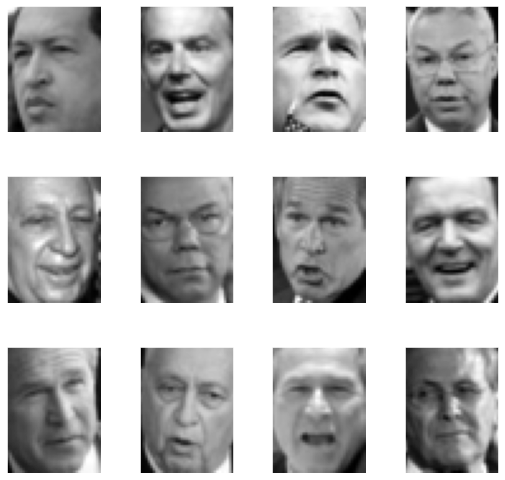

In [319]:
# displaying the actual images on which our algorithm will be trained

plt.figure(figsize=(1.8 * 4, 2.4 * 3))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(3 * 4):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

In [320]:
# the image matrix

X.shape

(1288, 1850)

In [321]:
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [322]:
print("Total dataset size:")
print("n_samples: ", n_samples)
print("n_features: ", n_features)
print("n_classes: ", n_classes)

Total dataset size:
n_samples:  1288
n_features:  1850
n_classes:  7


In [323]:
# splitting into train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [324]:
# fitting the model with raw data
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.0001)


In [325]:
y_pred = clf.predict(X_test)

In [326]:
# Saving the accuracy score of the model trained with raw data

scorea1 = accuracy_score(y_test, y_pred)
print(scorea1)

0.453416149068323


In [327]:
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        13
     Colin Powell       0.00      0.00      0.00        60
  Donald Rumsfeld       0.00      0.00      0.00        27
    George W Bush       0.45      1.00      0.62       146
Gerhard Schroeder       0.00      0.00      0.00        25
      Hugo Chavez       0.00      0.00      0.00        15
       Tony Blair       0.00      0.00      0.00        36

         accuracy                           0.45       322
        macro avg       0.06      0.14      0.09       322
     weighted avg       0.21      0.45      0.28       322



In [328]:
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

[[  0   0   0  13   0   0   0]
 [  0   0   0  60   0   0   0]
 [  0   0   0  27   0   0   0]
 [  0   0   0 146   0   0   0]
 [  0   0   0  25   0   0   0]
 [  0   0   0  15   0   0   0]
 [  0   0   0  36   0   0   0]]


* ## The model is only able to classify the photos of George W Bush while all the other target classes have zero precision,recall and f1 score. The model is only able to predict the face of George W Bush, we know this by seeing the classification report

In [329]:
# fitting 50 components of the pca

n_components = 50
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

In [330]:
eigenfaces = pca.components_.reshape((n_components, h, w))

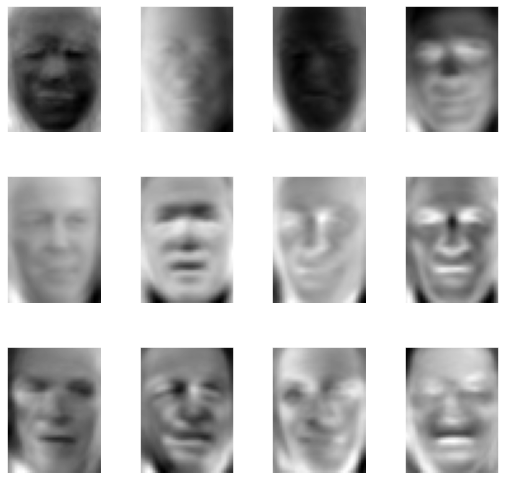

In [331]:
plt.figure(figsize=(1.8 * 4, 2.4 * 3))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(3 * 4):
    plt.subplot(3, 4, i + 1)
    plt.imshow(eigenfaces[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

In [332]:
# transforming the x_train and x_test with the pca components

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [333]:
# fitting svm on pca components

param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.01)


In [334]:
y_predpca = clf.predict(X_test_pca)

In [335]:
scorea2 = accuracy_score(y_test, y_predpca)
print(scorea2)

0.8136645962732919


In [336]:
print(classification_report(y_test, y_predpca, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.77      0.71        13
     Colin Powell       0.83      0.92      0.87        60
  Donald Rumsfeld       0.64      0.59      0.62        27
    George W Bush       0.87      0.89      0.88       146
Gerhard Schroeder       0.73      0.64      0.68        25
      Hugo Chavez       0.71      0.67      0.69        15
       Tony Blair       0.81      0.69      0.75        36

         accuracy                           0.81       322
        macro avg       0.75      0.74      0.74       322
     weighted avg       0.81      0.81      0.81       322



In [337]:
print(confusion_matrix(y_test, y_predpca, labels=range(n_classes)))

[[ 10   1   1   1   0   0   0]
 [  0  55   1   3   0   0   1]
 [  3   2  16   5   1   0   0]
 [  0   4   6 130   1   2   3]
 [  0   0   1   5  16   2   1]
 [  0   2   0   1   1  10   1]
 [  2   2   0   4   3   0  25]]


In [338]:
print('The accuracy of the model using raw data with over 1850 features: ',scorea1 )
print('The accuracy of the model using pca with only 50 features: ',scorea2)

The accuracy of the model using raw data with over 1850 features:  0.453416149068323
The accuracy of the model using pca with only 50 features:  0.8136645962732919


* ## The precision, recall and the f1 score of for all the classes are greater than the model which was trained on the raw data. The model which was trained on 50 pca components has an accuracy score greater or almost double that of the features trained on raw data. The accuracy has jumped from 45 to 81.

* ## We can see that the model which was fitted on 1850 features is underfit, while the model which was trained on the pca components is performing well.

* ## The model which was fitted on 1850 features took more time to train, while the model which was fitted on the pca components took very less time.

* ## We can observe that in this case not only has the model trained faster but also has much better accuracy when trained on the pca components when compared to the model which was trained on all the features.